# Give me some credit

Dans le cadre du projet final du cours **Apprentissage Statistique Appliqué**, nous avons choisi le jeu de données **Give Me Some Credit**, dont l’objectif est de prédire la probabilité qu’un emprunteur connaisse une **détresse financière** dans les **deux prochaines années**. La variable cible est binaire (*SeriousDlqin2yrs*) et indique si l’individu aura un retard de paiement **≥ 90 jours** (ou pire) sur cette période. Le jeu de données est particulièrement adapté à l’apprentissage supervisé : il contient un grand nombre d’observations (150 000 individus dans l’échantillon d’entraînement et 101 503 dans le test) et des variables quantitatives décrivant le profil de risque et la situation financière, telles que l’utilisation du crédit (*RevolvingUtilizationOfUnsecuredLines*), l’âge, le ratio d’endettement (*DebtRatio*), le revenu mensuel (*MonthlyIncome*), l’historique de retards (30–59, 60–89 et ≥90 jours), ainsi que des indicateurs liés aux crédits en cours (nombre de lignes de crédit et de prêts, prêts immobiliers, etc.) et aux charges familiales (*NumberOfDependents*). Ce cadre reflète un problème réel de décision (octroi/conditions de crédit) où l’enjeu est d’estimer une probabilité de défaut à partir d’indicateurs hétérogènes et potentiellement bruités, ce qui justifie l’usage de méthodes statistiques et de machine learning.


| Nom de la variable | Description | Type de donnée |
|---|---|---|
| SeriousDlqin2yrs | La personne a connu un retard de paiement de **90 jours** (ou plus) / une défaillance équivalente. | Oui/Non |
| RevolvingUtilizationOfUnsecuredLines | Solde total sur cartes de crédit et lignes de crédit personnelles (hors immobilier) et sans dette à échéances type prêt auto, divisé par la somme des plafonds de crédit. | pourcentage |
| Age | Âge de l’emprunteur (en années). | entier |
| NumberOfTime30-59DaysPastDueNotWorse | Nombre de fois où l’emprunteur a été en retard de **30–59 jours** (et pas pire) au cours des **2 dernières années**. | entier |
| DebtRatio | Paiements mensuels de dettes (pension alimentaire, coûts de vie, etc.) divisés par le revenu brut mensuel. | pourcentage |
| MonthlyIncome | Revenu mensuel. | réel |
| NumberOfOpenCreditLinesAndLoans | Nombre de prêts ouverts (à échéances : prêt auto, hypothèque, etc.) et de lignes de crédit (ex. cartes de crédit). | entier |
| NumberOfTimes90DaysLate | Nombre de fois où l’emprunteur a eu un retard de **90 jours** ou plus. | entier |
| NumberRealEstateLoansOrLines | Nombre de prêts immobiliers et de lignes de crédit immobilières (incluant les lignes de crédit sur valeur domiciliaire). | entier |
| NumberOfTime60-89DaysPastDueNotWorse | Nombre de fois où l’emprunteur a été en retard de **60–89 jours** (et pas pire) au cours des **2 dernières années**. | entier |
| NumberOfDependents | Nombre de personnes à charge dans le foyer, hors l’emprunteur (conjoint, enfants, etc.). | entier |


In [7]:
pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, roc_curve, make_scorer, recall_score)
import sklearn.metrics as metrics
from time import time

In [9]:
# Visualisation du jeu de données Give Me Some Credit
%matplotlib inline

path = 'cs-training.csv'
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True)  # enlever la colonne inutile (index)
print('Shape:', df.shape)
display(df.head())

Shape: (150000, 11)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [10]:
df["NumberOfDependents"] = df["NumberOfDependents"].astype("Int64") # conversion en entier nullable
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  Int64  
dtype

In [11]:
print('\nrepartitions des variables :')
df.describe()


repartitions des variables :


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.0
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.0
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.0
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.0


In [12]:
# Nombre de NaN par colonne
df.isna().sum().sort_values(ascending=False)


MonthlyIncome                           29731
NumberOfDependents                       3924
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
dtype: int64

In [13]:
# 1) Imputer MonthlyIncome par la médiane (uniquement là où c'est NaN)
median_income = df["MonthlyIncome"].median()
df["MonthlyIncome"] = df["MonthlyIncome"].fillna(median_income)

# 2) Supprimer les lignes où NumberOfDependents est NaN
df = df.dropna(subset=["NumberOfDependents"])


In [14]:
df.isna().sum().sort_values(ascending=False)

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

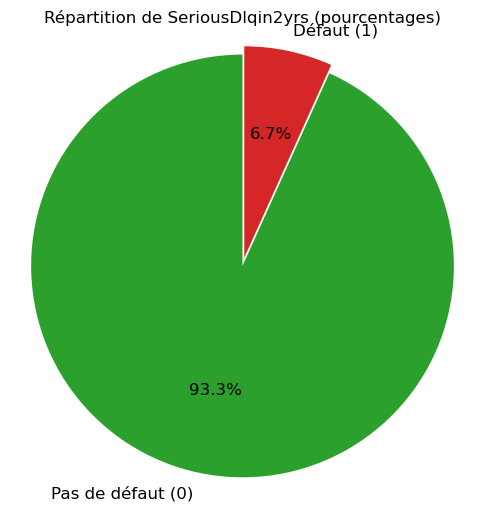

,count
SeriousDlqin2yrs,
0,136229
1,9847


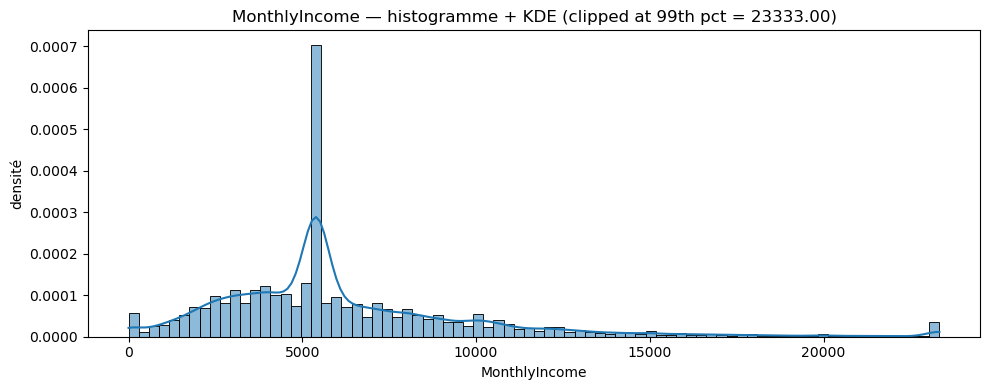

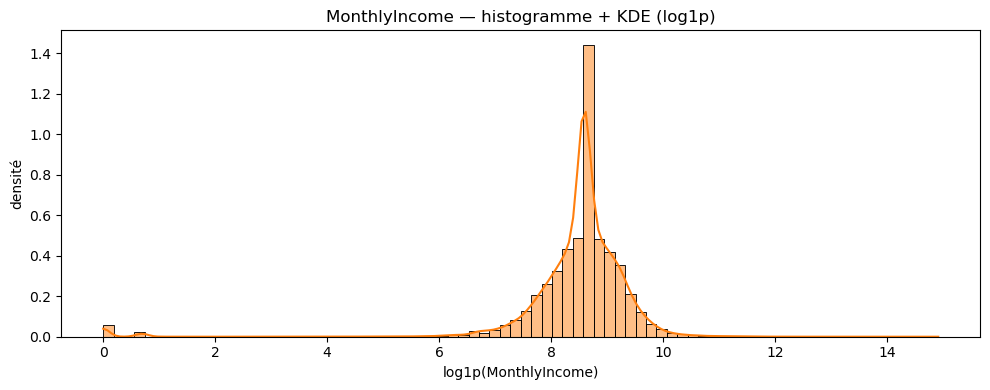

<Figure size 1200x800 with 0 Axes>

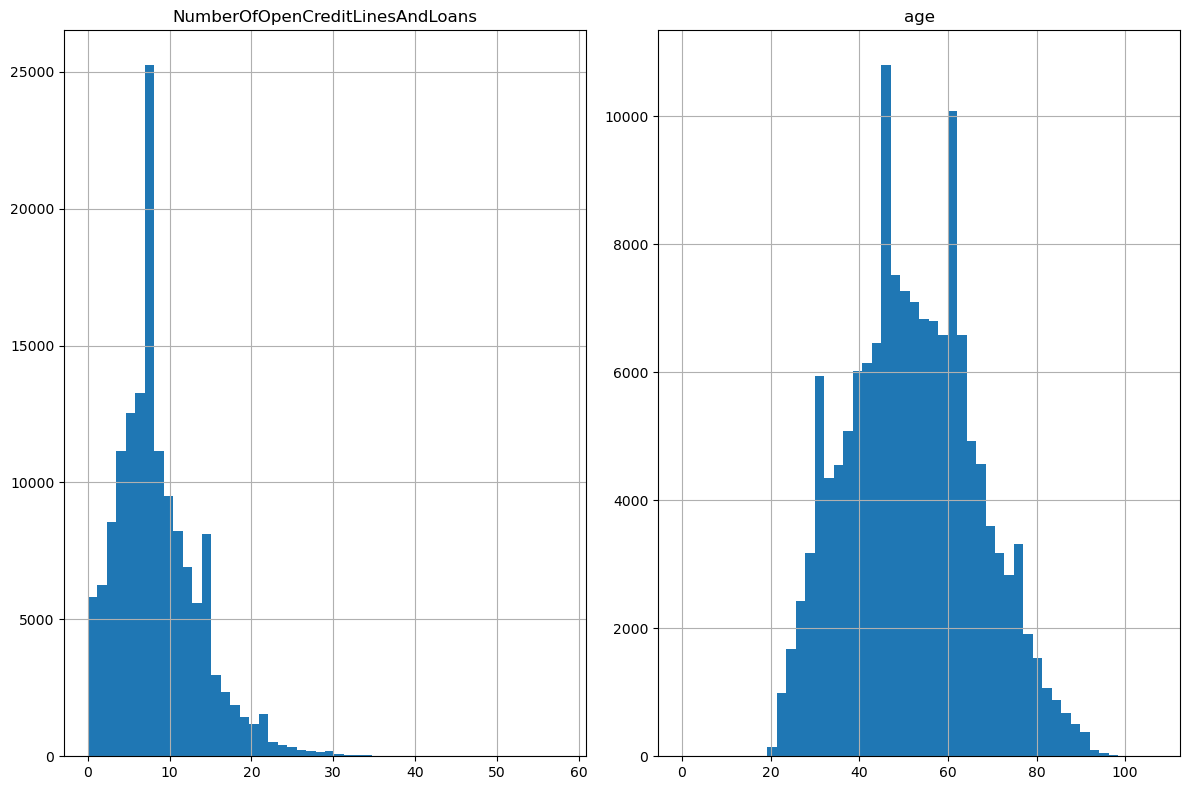

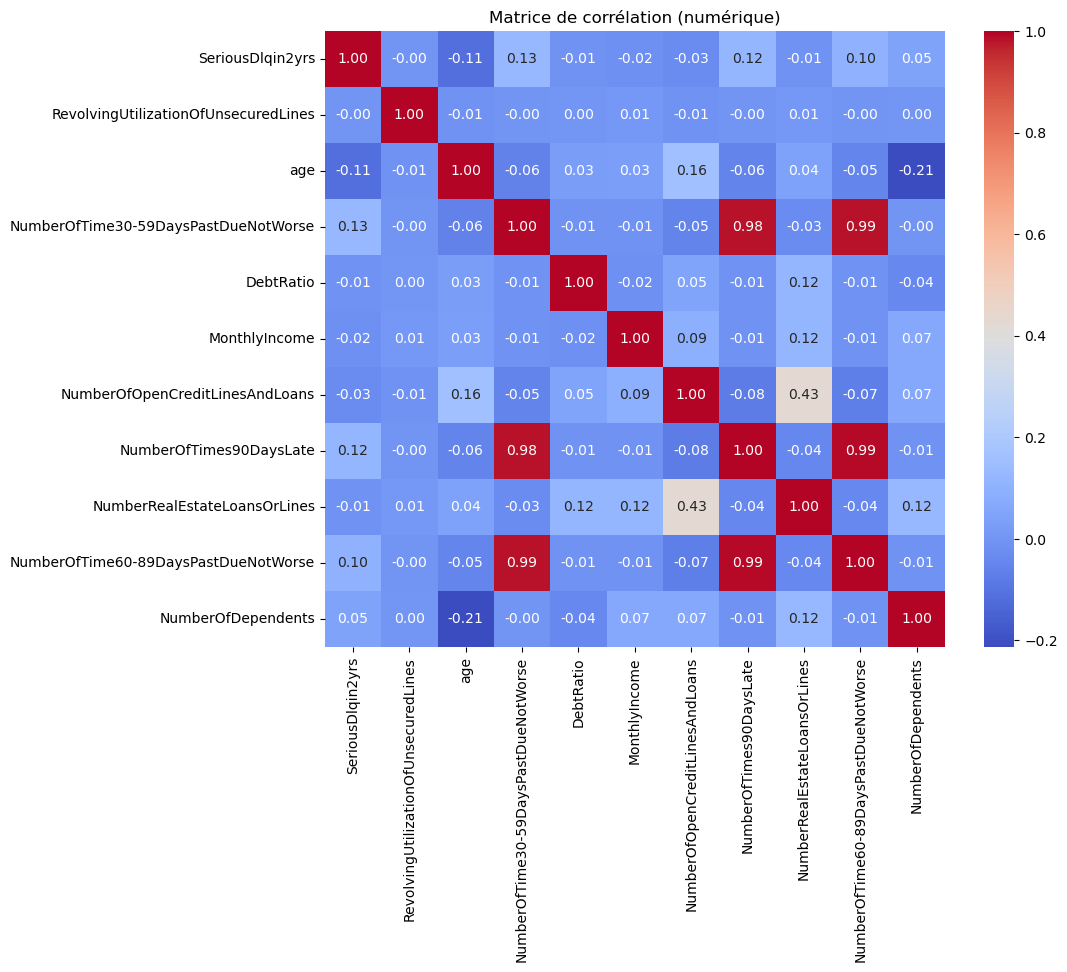

In [15]:
# Camembert vert / rouge pour SeriousDlqin2yrs
counts = df['SeriousDlqin2yrs'].value_counts().reindex([0,1]).fillna(0).astype(int)
labels = ['Pas de défaut (0)', 'Défaut (1)']
plt.figure(figsize=(6,6))
colors = ['#2ca02c', '#d62728']  # vert, rouge
explode = [0.02, 0.02]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, textprops={'fontsize':12})
plt.title('Répartition de SeriousDlqin2yrs (pourcentages)')
plt.axis('equal')
plt.show()

# Afficher le tableau des comptes
display(counts.rename('count').to_frame())

# Courbe de distribution pour MonthlyIncome
import numpy as np
col = 'MonthlyIncome'

# s'assurer que MonthlyIncome est numérique
df[col] = pd.to_numeric(df[col], errors='coerce')
series = df[col].dropna()

# Tracé 1 : histogramme + KDE sur une échelle linéaire, tronqué au 99ème percentile
upper = series.quantile(0.99)
clipped = series.clip(upper=upper)
plt.figure(figsize=(10,4))
sns.histplot(clipped, bins=80, kde=True, color='tab:blue', stat='density')
plt.title(f"MonthlyIncome — histogramme + KDE (clipped at 99th pct = {upper:.2f})")
plt.xlabel('MonthlyIncome')
plt.ylabel('densité')
plt.tight_layout()
plt.show()

# Tracé 2 : histogramme + KDE en échelle log1p
pos = series[series > -1]
plt.figure(figsize=(10,4))
sns.histplot(np.log1p(pos), bins=80, kde=True, color='tab:orange', stat='density')
plt.title('MonthlyIncome — histogramme + KDE (log1p)')
plt.xlabel('log1p(MonthlyIncome)')
plt.ylabel('densité')
plt.tight_layout()
plt.show()

# Histogrammes de quelques variables numériques clés
cols = ['NumberOfOpenCreditLinesAndLoans', 'age',]
plt.figure(figsize=(12,8))
df[cols].hist(bins=50, figsize=(12,8))
plt.tight_layout()
plt.show()

# Matrice de corrélation pour les colonnes numériques
plt.figure(figsize=(10,8))
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matrice de corrélation (numérique)')
plt.show()

La matrice de corrélation met en évidence une **forte redondance** entre les variables décrivant l’historique de retards de paiement : `NumberOfTime30-59DaysPastDueNotWorse`, `NumberOfTime60-89DaysPastDueNotWorse` et `NumberOfTimes90DaysLate` sont **très fortement corrélées entre elles** (≈ 0.98–0.99), ce qui suggère un risque de **multicolinéarité** dans des modèles linéaires. Par ailleurs, la variable cible `SeriousDlqin2yrs` présente des corrélations **positives mais modestes** avec ces compteurs de retards (≈ 0.10–0.13) et une corrélation **négative** avec l’âge (≈ −0.12), ce qui est cohérent avec l’intuition économique (risque de défaut plus élevé pour les profils plus jeunes et/ou avec incidents passés). Enfin, on observe une corrélation modérée entre `NumberOfOpenCreditLinesAndLoans` et `NumberRealEstateLoansOrLines` (≈ 0.43), reflétant un lien structurel entre la détention de plusieurs produits de crédit et la présence de prêts immobiliers.


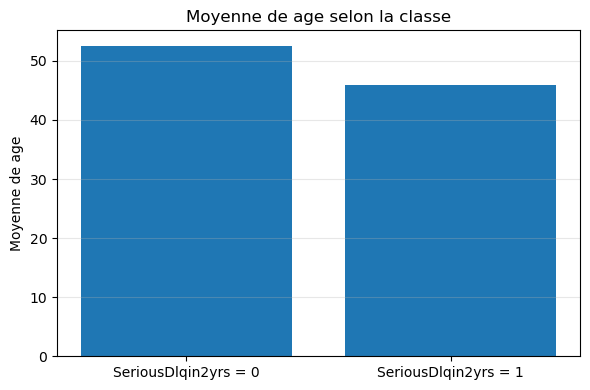

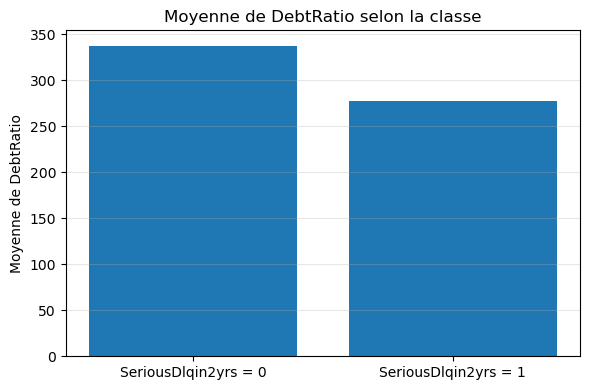

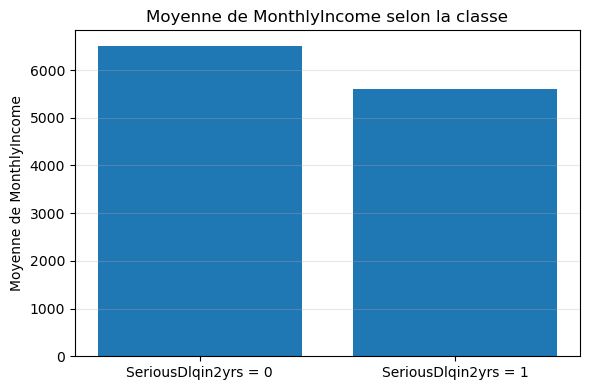

In [16]:
# Moyennes des variables numériques selon la classe SeriousDlqin2yrs

target = "SeriousDlqin2yrs"
vars_ = ["age", "DebtRatio", "MonthlyIncome"]

# s'assurer que c'est numérique
for v in vars_:
    df[v] = pd.to_numeric(df[v], errors="coerce")

# moyennes par classe
means = df.groupby(target)[vars_].mean()

for v in vars_:
    fig, ax = plt.subplots(figsize=(6, 4))
    
    y = [means.loc[0, v], means.loc[1, v]]
    ax.bar([0, 1], y)
    
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["SeriousDlqin2yrs = 0", "SeriousDlqin2yrs = 1"])
    ax.set_ylabel(f"Moyenne de {v}")
    ax.set_title(f"Moyenne de {v} selon la classe")
    ax.grid(axis="y", alpha=0.3)
    
    plt.tight_layout()
    plt.show()



In [17]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [18]:
from scipy.stats import ks_2samp

results = []

for v in vars_:
    x0 = df.loc[df[target] == 0, v].dropna().values
    x1 = df.loc[df[target] == 1, v].dropna().values

    ks = ks_2samp(x0, x1, alternative="two-sided", mode="auto")
    results.append({
        "variable": v,
        "n0": len(x0),
        "n1": len(x1),
        "mean_0": float(np.mean(x0)),
        "mean_1": float(np.mean(x1)),
        "KS_D": float(ks.statistic),
        "p_value": float(ks.pvalue)
    })

res = pd.DataFrame(results).sort_values("KS_D", ascending=False)
res


,variable,n0,n1,mean_0,mean_1,KS_D,p_value
0,age,136229,9847,52.546514,45.911953,0.202358,0.000000e+00
2,MonthlyIncome,136229,9847,6507.247510,5595.898954,0.119787,2.821736e-115
1,DebtRatio,136229,9847,337.422198,277.363036,0.076526,3.222517e-47


Le test de Kolmogorov–Smirnov (2-échantillons) met en évidence des différences significatives de distribution entre les classes `SeriousDlqin2yrs = 0` et `SeriousDlqin2yrs = 1` pour les trois variables étudiées (p-values extrêmement faibles). En termes de taille d’effet (statistique KS *D*), l’âge est la variable la plus discriminante (*D* ≈ 0,206), suivie de `MonthlyIncome` (*D* ≈ 0,126) puis de `DebtRatio` (*D* ≈ 0,071). Les emprunteurs en défaut sont en moyenne plus jeunes et présentent des revenus plus faibles, tandis que `DebtRatio` montre une séparation plus limitée pris isolément.


In [19]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [20]:
# ============================================================================
# CODE COMMUN - PRÉPARATION DES DONNÉES ET SPLIT TRAIN/TEST
# ============================================================================

# Séparation features et target
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

print(f"\nShape df complet: {df.shape}")
print(f"\nValeurs manquantes dans df:\n{df.isna().sum()}")

# Suppression des lignes avec valeur manquante dans y si nécessaire
if y.isna().sum() > 0:
    print(f"\n⚠️ Suppression de {y.isna().sum()} lignes avec valeur manquante dans y")
    mask = ~y.isna()
    X = X[mask]
    y = y[mask]

print(f"\nDistribution de la cible:")
print(y.value_counts())
print(f"\nProportion:")
print(y.value_counts(normalize=True))

# Split train/test interne (75/25)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=123, test_size=0.25, stratify=y
)

print(f"\nTaille X_train: {X_train.shape}")
print(f"Taille X_test: {X_test.shape}")

print("\n✓ Données préparées et prêtes pour la modélisation")


Shape df complet: (146076, 11)

Valeurs manquantes dans df:
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

Distribution de la cible:
SeriousDlqin2yrs
0    136229
1      9847
Name: count, dtype: int64

Proportion:
SeriousDlqin2yrs
0    0.93259
1    0.06741
Name: proportion, dtype: float64

Taille X_train: (109557, 10)
Taille X_test: (36519, 10)

✓ Données préparées et prêtes pour la modélisation


ENTRAÎNEMENT DU MODÈLE DE RÉGRESSION LOGISTIQUE


c:\Users\hp\anaconda3\envs\Ilias_projects\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\hp\anaconda3\envs\Ilias_projects\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


✓ Modèle entraîné avec succès
✓ Solver: saga, Penalty: L1, C: 1.0, class_weight: balanced

COEFFICIENTS ESTIMÉS ET IMPORTANCE DES VARIABLES

 Coefficients du modèle (triés par importance absolue):
                            Variable  Coefficient  Abs_Coefficient  Odds_Ratio
             NumberOfTimes90DaysLate     2.488351         2.488351   12.041401
NumberOfTime30-59DaysPastDueNotWorse     2.232352         2.232352    9.321767
NumberOfTime60-89DaysPastDueNotWorse     0.752326         0.752326    2.121931
                                 age    -0.435532         0.435532    0.646920
                       MonthlyIncome    -0.326731         0.326731    0.721277
        NumberRealEstateLoansOrLines     0.091294         0.091294    1.095591
                           DebtRatio    -0.084220         0.084220    0.919229
                  NumberOfDependents     0.062932         0.062932    1.064955
RevolvingUtilizationOfUnsecuredLines    -0.027297         0.027297    0.973072
     NumberOf

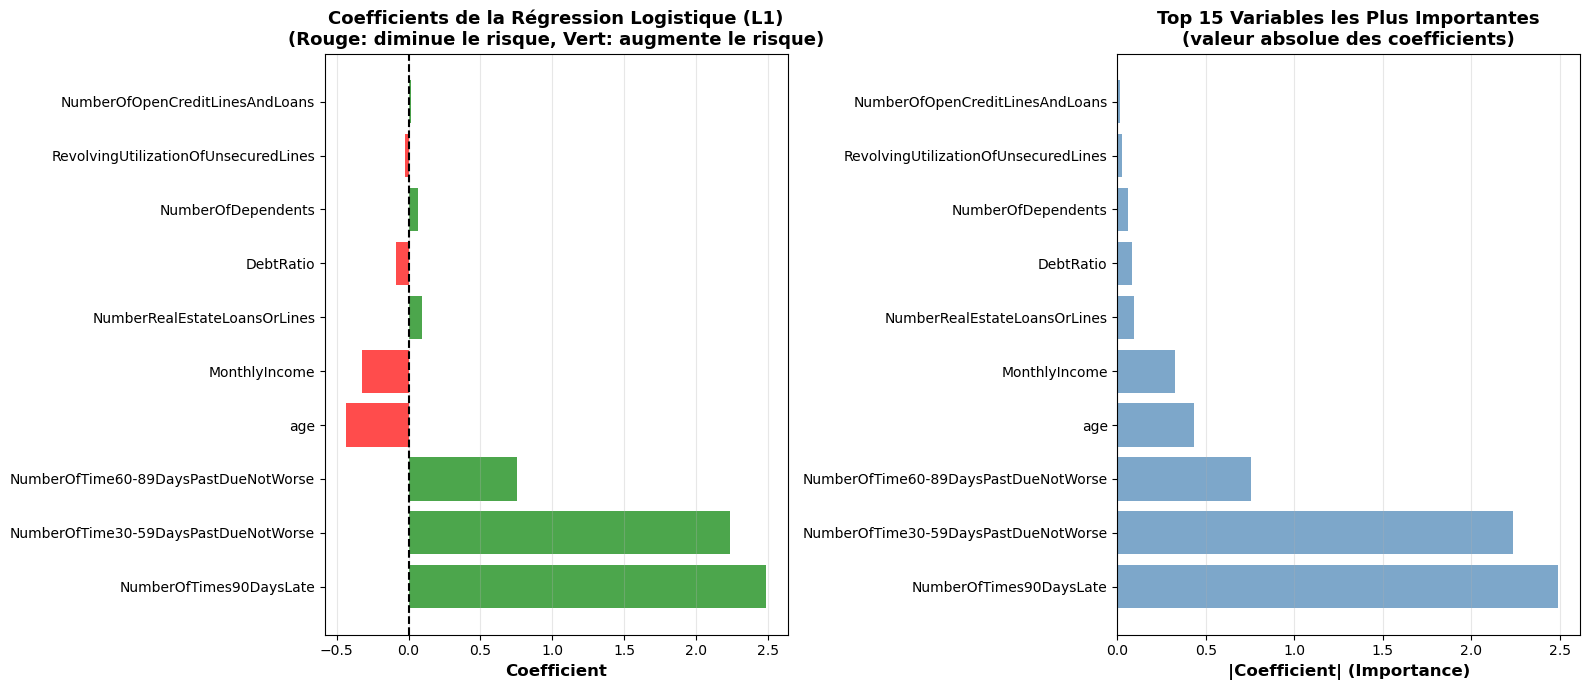

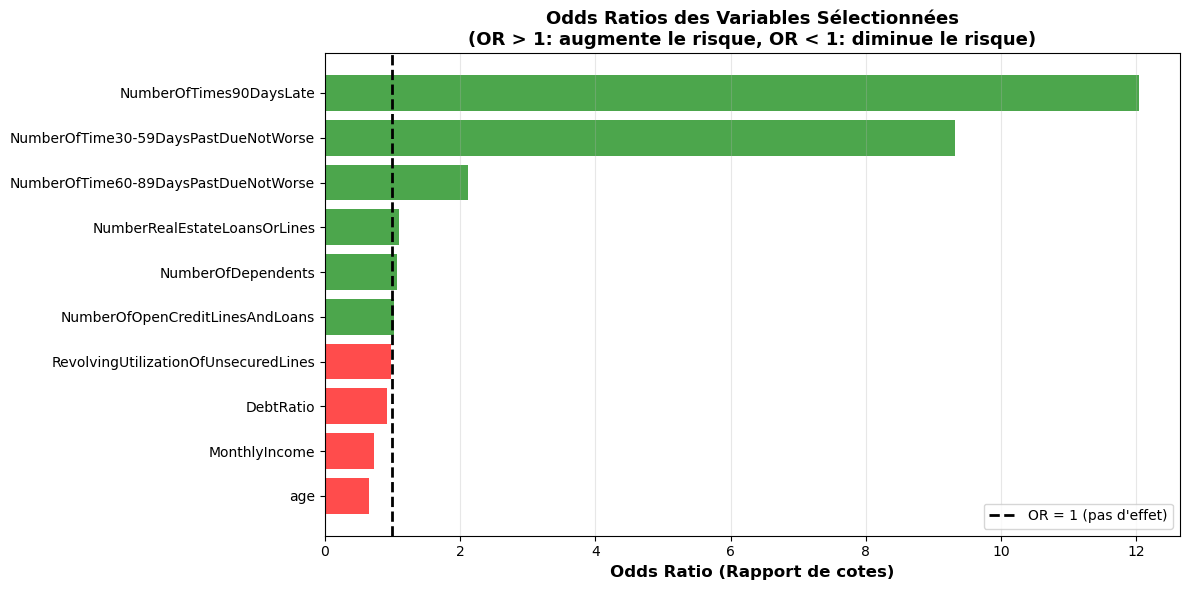


ÉVALUATION DU MODÈLE

 PERFORMANCE SUR L'ENSEMBLE D'ENTRAÎNEMENT:
AUC-ROC: 0.8019

Rapport de classification:
                   precision    recall  f1-score   support

Pas de défaut (0)       0.97      0.81      0.88    102172
       Défaut (1)       0.20      0.65      0.30      7385

         accuracy                           0.80    109557
        macro avg       0.58      0.73      0.59    109557
     weighted avg       0.92      0.80      0.84    109557


 PERFORMANCE SUR L'ENSEMBLE DE TEST:
AUC-ROC: 0.7979

Rapport de classification:
                   precision    recall  f1-score   support

Pas de défaut (0)       0.97      0.81      0.88     34057
       Défaut (1)       0.19      0.62      0.29      2462

         accuracy                           0.80     36519
        macro avg       0.58      0.72      0.59     36519
     weighted avg       0.92      0.80      0.84     36519



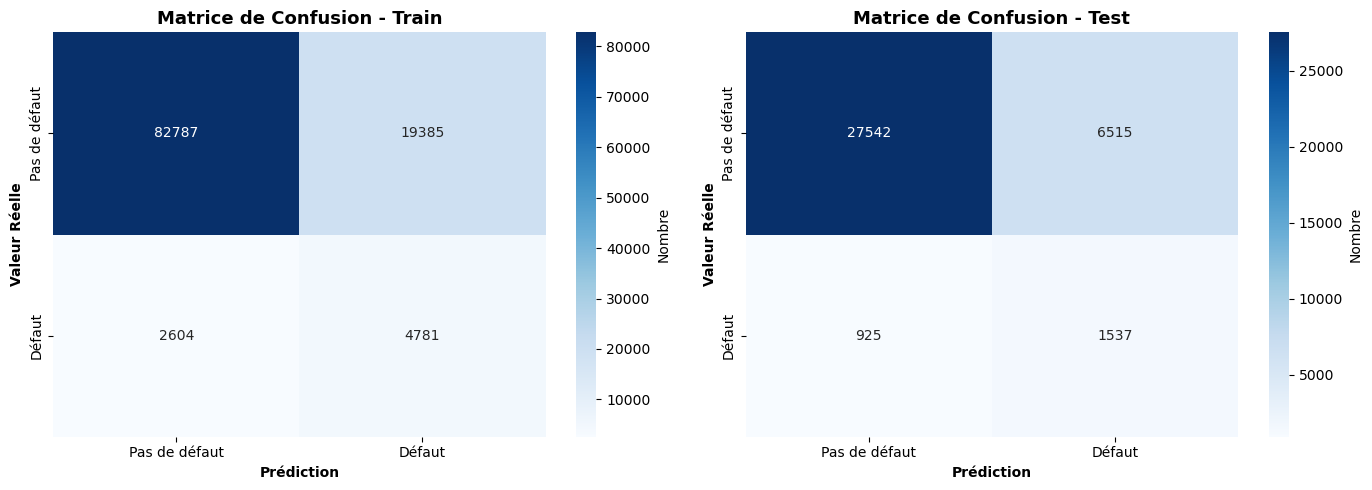

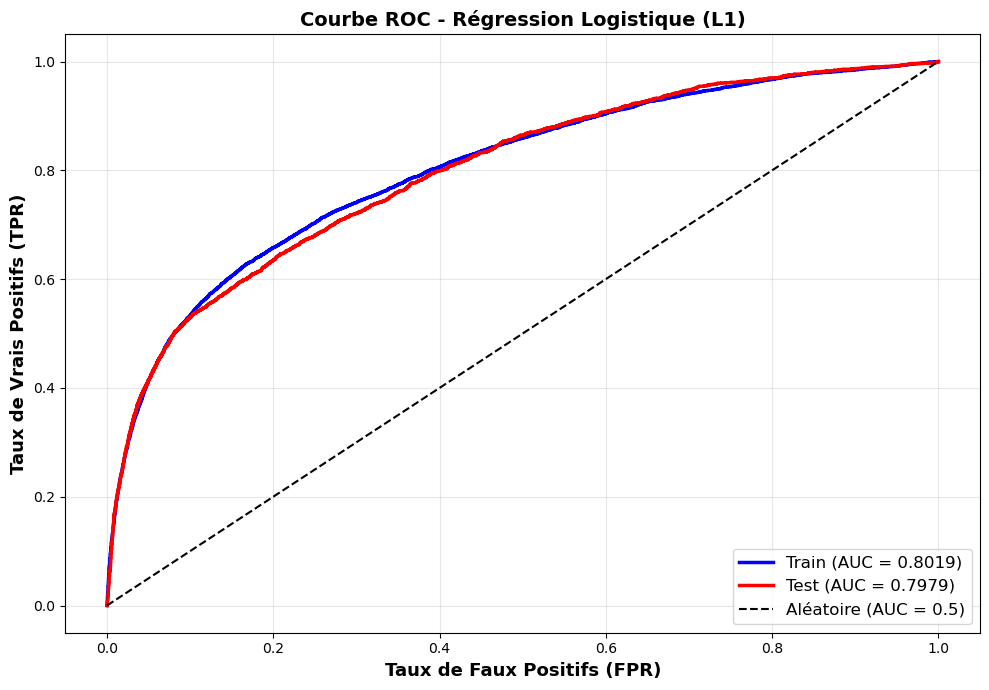


INTERPRÉTATION DES COEFFICIENTS

 Variables qui AUGMENTENT le risque de défaut (6 variables):

  1. NumberOfTimes90DaysLate
     Coefficient: 2.4884
     Odds Ratio: 12.0414
     → Chaque augmentation d'1 écart-type multiplie les chances de défaut par 12.04

  2. NumberOfTime30-59DaysPastDueNotWorse
     Coefficient: 2.2324
     Odds Ratio: 9.3218
     → Chaque augmentation d'1 écart-type multiplie les chances de défaut par 9.32

  3. NumberOfTime60-89DaysPastDueNotWorse
     Coefficient: 0.7523
     Odds Ratio: 2.1219
     → Chaque augmentation d'1 écart-type multiplie les chances de défaut par 2.12

  4. NumberRealEstateLoansOrLines
     Coefficient: 0.0913
     Odds Ratio: 1.0956
     → Chaque augmentation d'1 écart-type multiplie les chances de défaut par 1.10

  5. NumberOfDependents
     Coefficient: 0.0629
     Odds Ratio: 1.0650
     → Chaque augmentation d'1 écart-type multiplie les chances de défaut par 1.06


 Variables qui DIMINUENT le risque de défaut (4 variables):

  1.

In [21]:
# Modèle de Régression Logistique pour prédire SeriousDlqin2yrs
# Standardisation
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir en DataFrame pour garder les noms de colonnes
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("ENTRAÎNEMENT DU MODÈLE DE RÉGRESSION LOGISTIQUE")
# Modèle de régression logistique avec L1 
logit = LogisticRegression(
    random_state=123,
    solver='saga',
    penalty='l1',
    class_weight='balanced',
    C=1.0,
    max_iter=500
)

logit.fit(X_train_scaled, y_train)
print("✓ Modèle entraîné avec succès")
print(f"✓ Solver: saga, Penalty: L1, C: 1.0, class_weight: balanced")

# Prédictions
y_train_pred = logit.predict(X_train_scaled)
y_test_pred = logit.predict(X_test_scaled)
y_train_proba = logit.predict_proba(X_train_scaled)[:, 1]
y_test_proba = logit.predict_proba(X_test_scaled)[:, 1]

print("\n" + "=" * 80)
print("COEFFICIENTS ESTIMÉS ET IMPORTANCE DES VARIABLES")
print("=" * 80)

# Création d'un DataFrame avec les coefficients
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': logit.coef_[0],
    'Abs_Coefficient': np.abs(logit.coef_[0]),
    'Odds_Ratio': np.exp(logit.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("\n Coefficients du modèle (triés par importance absolue):")
print(coef_df.to_string(index=False))
print(f"\nIntercept: {logit.intercept_[0]:.4f}")

# Nombre de coefficients non nuls (grâce à la régularisation L1)
non_zero = (coef_df['Coefficient'] != 0).sum()
print(f"\n✓ Nombre de variables sélectionnées (coefficients non nuls): {non_zero}/{len(coef_df)}")

# Visualisation des coefficients
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Graphique 1: Coefficients bruts
ax1 = axes[0]
colors = ['red' if c < 0 else 'green' for c in coef_df['Coefficient']]
bars = ax1.barh(coef_df['Variable'], coef_df['Coefficient'], color=colors, alpha=0.7)
ax1.set_xlabel('Coefficient', fontsize=12, fontweight='bold')
ax1.set_title('Coefficients de la Régression Logistique (L1)\n(Rouge: diminue le risque, Vert: augmente le risque)', 
              fontsize=13, fontweight='bold')
ax1.axvline(x=0, color='black', linestyle='--', linewidth=1.5)
ax1.grid(axis='x', alpha=0.3)

# Graphique 2: Importance absolue (top variables)
ax2 = axes[1]
top_vars = coef_df[coef_df['Abs_Coefficient'] > 0].head(15)  # Top 15 variables non nulles
ax2.barh(top_vars['Variable'], top_vars['Abs_Coefficient'], color='steelblue', alpha=0.7)
ax2.set_xlabel('|Coefficient| (Importance)', fontsize=12, fontweight='bold')
ax2.set_title('Top 15 Variables les Plus Importantes\n(valeur absolue des coefficients)', 
              fontsize=13, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Graphique des Odds Ratios (variables sélectionnées uniquement)
selected_vars = coef_df[coef_df['Coefficient'] != 0].sort_values('Coefficient', ascending=True)
if len(selected_vars) > 0:
    plt.figure(figsize=(12, max(6, len(selected_vars)*0.4)))
    colors_or = ['red' if c < 1 else 'green' for c in selected_vars['Odds_Ratio']]
    plt.barh(selected_vars['Variable'], selected_vars['Odds_Ratio'], color=colors_or, alpha=0.7)
    plt.axvline(x=1, color='black', linestyle='--', linewidth=2, label='OR = 1 (pas d\'effet)')
    plt.xlabel('Odds Ratio (Rapport de cotes)', fontsize=12, fontweight='bold')
    plt.title('Odds Ratios des Variables Sélectionnées\n(OR > 1: augmente le risque, OR < 1: diminue le risque)', 
              fontsize=13, fontweight='bold')
    plt.legend()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

print("\n" + "=" * 80)
print("ÉVALUATION DU MODÈLE")
print("=" * 80)

# Métriques de performance
print("\n PERFORMANCE SUR L'ENSEMBLE D'ENTRAÎNEMENT:")
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
auc_train = roc_auc_score(y_train, y_train_proba)
print(f"AUC-ROC: {auc_train:.4f}")
print("\nRapport de classification:")
print(classification_report(y_train, y_train_pred, target_names=['Pas de défaut (0)', 'Défaut (1)']))

print("\n PERFORMANCE SUR L'ENSEMBLE DE TEST:")
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
auc_test = roc_auc_score(y_test, y_test_proba)
print(f"AUC-ROC: {auc_test:.4f}")
print("\nRapport de classification:")
print(classification_report(y_test, y_test_pred, target_names=['Pas de défaut (0)', 'Défaut (1)']))

# Matrice de confusion
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, (y_true, y_pred, title) in enumerate([
    (y_train, y_train_pred, 'Train'),
    (y_test, y_test_pred, 'Test')
]):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Pas de défaut', 'Défaut'],
                yticklabels=['Pas de défaut', 'Défaut'],
                cbar_kws={'label': 'Nombre'})
    axes[idx].set_title(f'Matrice de Confusion - {title}', fontsize=13, fontweight='bold')
    axes[idx].set_ylabel('Valeur Réelle', fontweight='bold')
    axes[idx].set_xlabel('Prédiction', fontweight='bold')

plt.tight_layout()
plt.show()

# Courbe ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr_train, tpr_train, label=f'Train (AUC = {auc_train:.4f})', 
         linewidth=2.5, color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test (AUC = {auc_test:.4f})', 
         linewidth=2.5, color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire (AUC = 0.5)', linewidth=1.5)
plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=13, fontweight='bold')
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=13, fontweight='bold')
plt.title('Courbe ROC - Régression Logistique (L1)', fontsize=14, fontweight='bold')
plt.legend(fontsize=12, loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("INTERPRÉTATION DES COEFFICIENTS")
print("=" * 80)

# Variables sélectionnées avec coefficient positif
positive_vars = coef_df[(coef_df['Coefficient'] > 0)].sort_values('Coefficient', ascending=False)
# Variables sélectionnées avec coefficient négatif
negative_vars = coef_df[(coef_df['Coefficient'] < 0)].sort_values('Coefficient', ascending=True)

if len(positive_vars) > 0:
    print(f"\n Variables qui AUGMENTENT le risque de défaut ({len(positive_vars)} variables):")
    for idx, (i, row) in enumerate(positive_vars.head(5).iterrows(), 1):
        print(f"\n  {idx}. {row['Variable']}")
        print(f"     Coefficient: {row['Coefficient']:.4f}")
        print(f"     Odds Ratio: {row['Odds_Ratio']:.4f}")
        print(f"     → Chaque augmentation d'1 écart-type multiplie les chances de défaut par {row['Odds_Ratio']:.2f}")

if len(negative_vars) > 0:
    print(f"\n\n Variables qui DIMINUENT le risque de défaut ({len(negative_vars)} variables):")
    for idx, (i, row) in enumerate(negative_vars.head(5).iterrows(), 1):
        print(f"\n  {idx}. {row['Variable']}")
        print(f"     Coefficient: {row['Coefficient']:.4f}")
        print(f"     Odds Ratio: {row['Odds_Ratio']:.4f}")
        print(f"     → Chaque augmentation d'1 écart-type multiplie les chances de défaut par {row['Odds_Ratio']:.2f}")
        print(f"        (soit une réduction de {(1-row['Odds_Ratio'])*100:.1f}%)")

# Variables éliminées par L1
eliminated = coef_df[coef_df['Coefficient'] == 0]
if len(eliminated) > 0:
    print(f"\n\n🚫 Variables ÉLIMINÉES par la régularisation L1 ({len(eliminated)} variables):")
    print(eliminated['Variable'].tolist())

print("\n" + "=" * 80)
print("RÉSUMÉ")
print("=" * 80)
print(f"✓ Modèle: Régression Logistique avec régularisation L1 (LASSO)")
print(f"✓ Variables sélectionnées: {non_zero}/{len(coef_df)}")
print(f"✓ AUC-ROC Train: {auc_train:.4f}")
print(f"✓ AUC-ROC Test: {auc_test:.4f}")
print(f"✓ Différence Train-Test: {abs(auc_train - auc_test):.4f} {'(léger surapprentissage)' if auc_train - auc_test > 0.05 else '(bon équilibre)'}")


RANDOM FOREST - CROSS-VALIDATION POUR OPTIMISER LES HYPERPARAMÈTRES

📋 Grille de paramètres à tester:
   n_estimators: [50, 100, 200]
   max_depth: [10, 20, None]
   min_samples_split: [20, 50, 100]
   min_samples_leaf: [10, 20, 30]

🔢 Nombre total de combinaisons: 81
🔢 Avec 3-fold CV: 243 entraînements de modèles

🔍 Lancement de la Grid Search (cela peut prendre plusieurs minutes)...
Fitting 3 folds for each of 81 candidates, totalling 243 fits

✓ Grid Search terminée en 6.36 minutes

MEILLEURS HYPERPARAMÈTRES TROUVÉS

 Meilleurs paramètres:
   max_depth: 10
   min_samples_leaf: 30
   min_samples_split: 100
   n_estimators: 200

 Meilleur score CV (AUC-ROC): 0.8625

ANALYSE DES RÉSULTATS DE CROSS-VALIDATION

 Top 10 des meilleures combinaisons de paramètres:

1. AUC-ROC Test: 0.8625 (±0.0063)
   AUC-ROC Train: 0.8866
   Paramètres: {'max_depth': 10, 'min_samples_leaf': 30, 'min_samples_split': 100, 'n_estimators': 200}

2. AUC-ROC Test: 0.8625 (±0.0063)
   AUC-ROC Train: 0.8874
   Pa

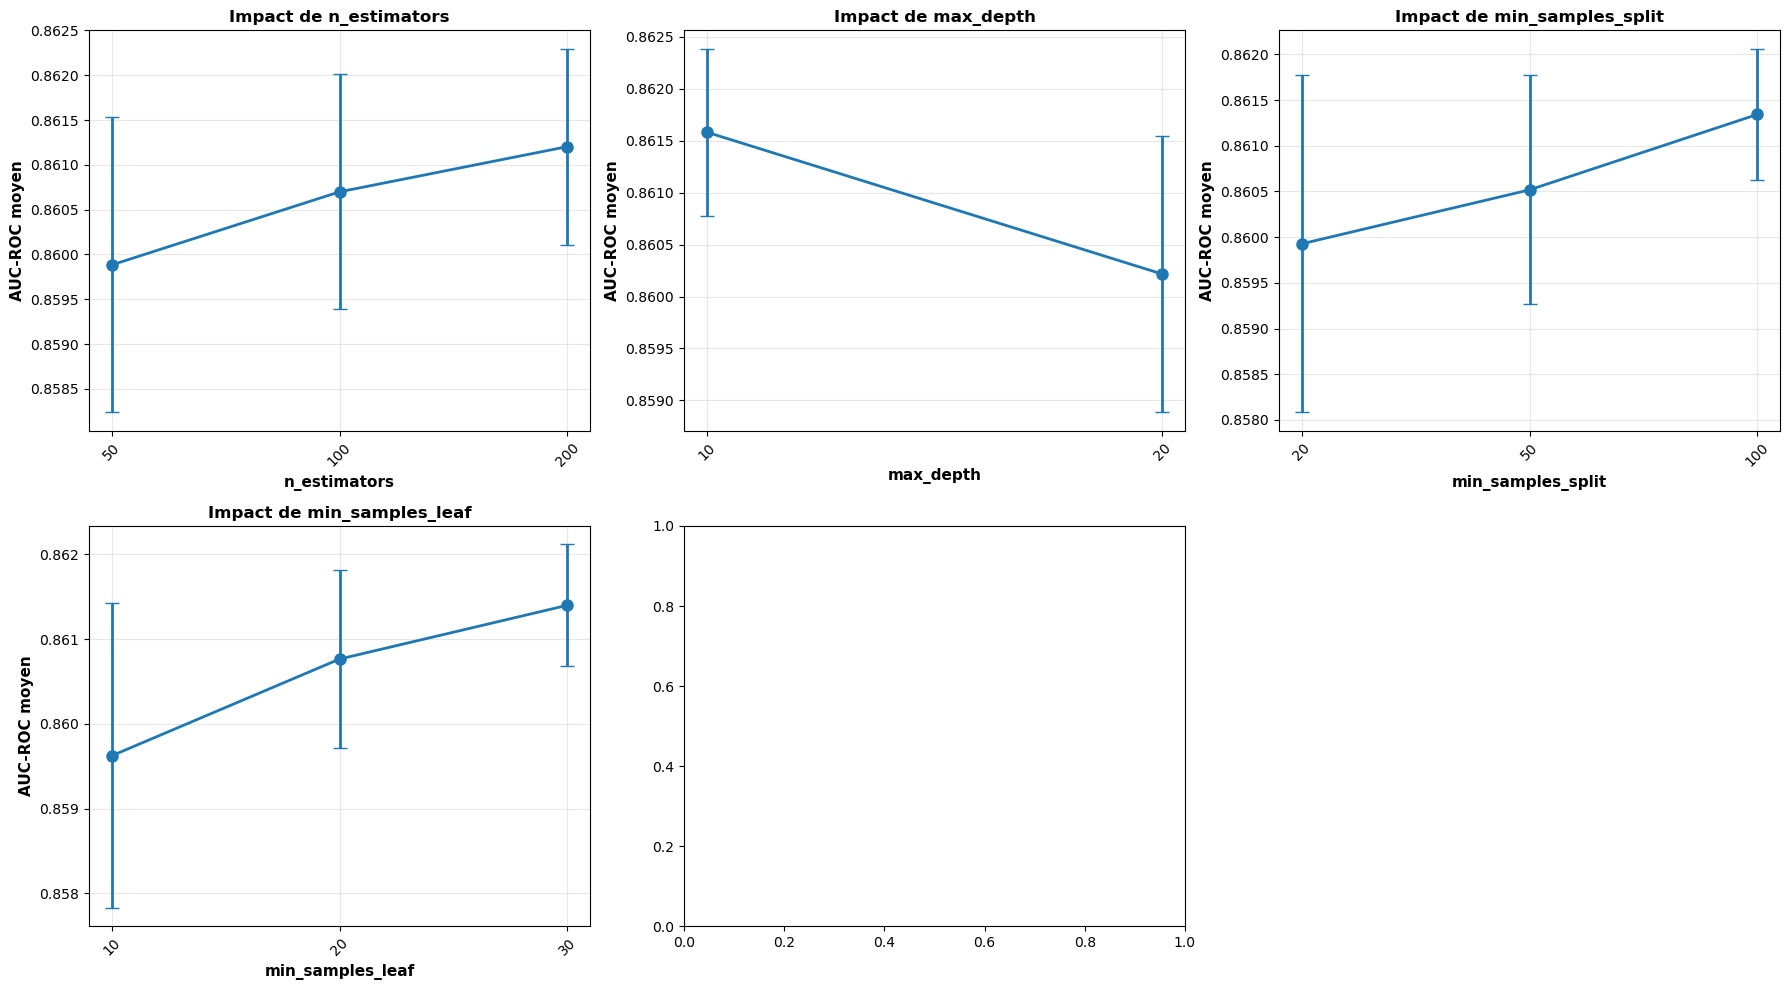


IMPORTANCE DES VARIABLES (FEATURE IMPORTANCE)

 Importance des variables (triées par ordre décroissant):
                            Variable  Importance
RevolvingUtilizationOfUnsecuredLines    0.371994
             NumberOfTimes90DaysLate    0.198817
NumberOfTime30-59DaysPastDueNotWorse    0.188477
NumberOfTime60-89DaysPastDueNotWorse    0.087253
                                 age    0.047753
                           DebtRatio    0.030670
     NumberOfOpenCreditLinesAndLoans    0.027380
                       MonthlyIncome    0.024697
        NumberRealEstateLoansOrLines    0.018343
                  NumberOfDependents    0.004614


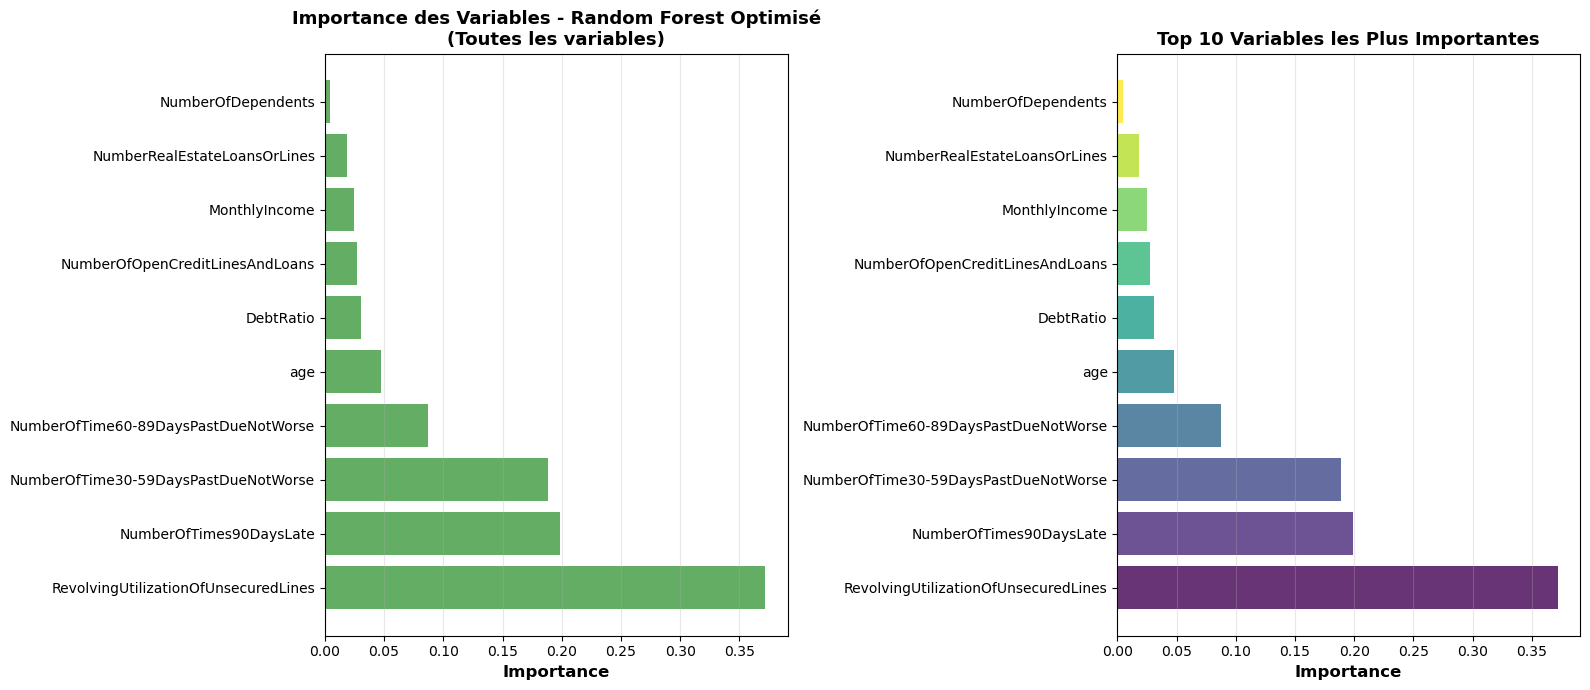

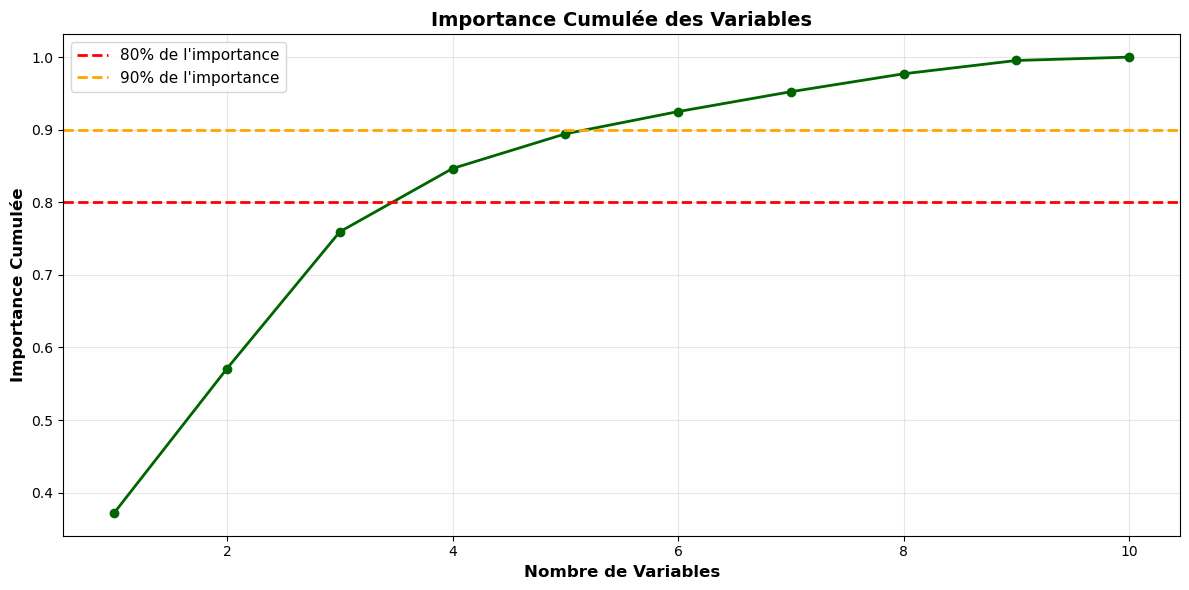


 4 variables représentent 80% de l'importance totale
 6 variables représentent 90% de l'importance totale

ÉVALUATION DU MODÈLE - RANDOM FOREST OPTIMISÉ

 PERFORMANCE SUR L'ENSEMBLE D'ENTRAÎNEMENT:
AUC-ROC: 0.8824

Rapport de classification:
                   precision    recall  f1-score   support

Pas de défaut (0)       0.98      0.82      0.89    102172
       Défaut (1)       0.24      0.79      0.37      7385

         accuracy                           0.82    109557
        macro avg       0.61      0.80      0.63    109557
     weighted avg       0.93      0.82      0.86    109557


 PERFORMANCE SUR L'ENSEMBLE DE TEST:
AUC-ROC: 0.8634

Rapport de classification:
                   precision    recall  f1-score   support

Pas de défaut (0)       0.98      0.81      0.89     34057
       Défaut (1)       0.23      0.75      0.35      2462

         accuracy                           0.81     36519
        macro avg       0.60      0.78      0.62     36519
     weighted avg    

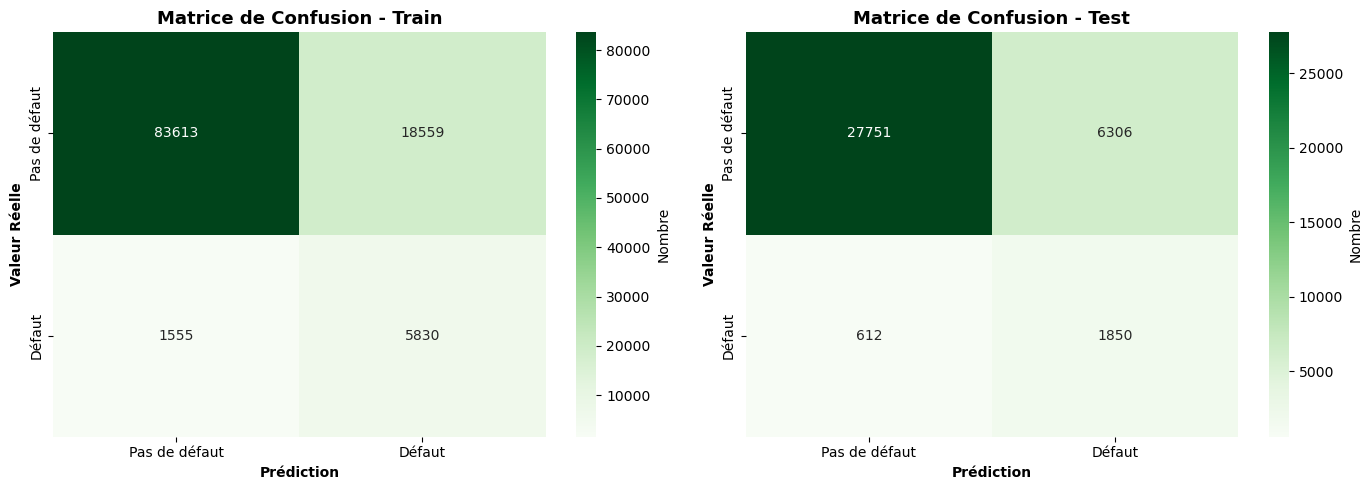

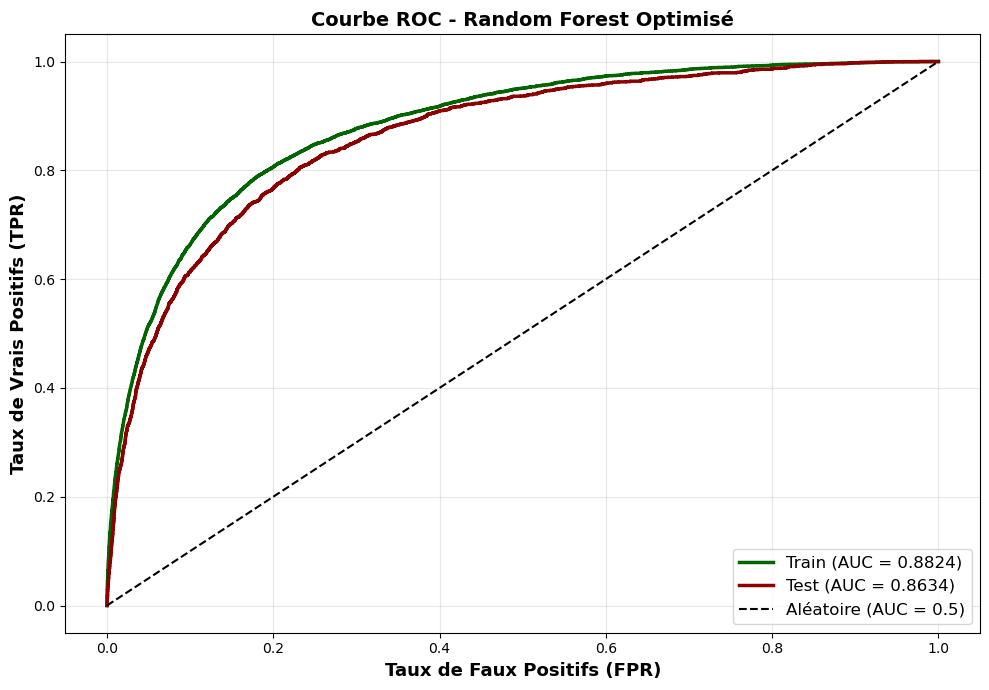


INTERPRÉTATION DE L'IMPORTANCE DES VARIABLES

⭐ Top 5 des variables les plus importantes:

  1. RevolvingUtilizationOfUnsecuredLines
     Importance: 0.3720 (37.20%)
     → Cette variable contribue à 37.20% des décisions du modèle

  2. NumberOfTimes90DaysLate
     Importance: 0.1988 (19.88%)
     → Cette variable contribue à 19.88% des décisions du modèle

  3. NumberOfTime30-59DaysPastDueNotWorse
     Importance: 0.1885 (18.85%)
     → Cette variable contribue à 18.85% des décisions du modèle

  4. NumberOfTime60-89DaysPastDueNotWorse
     Importance: 0.0873 (8.73%)
     → Cette variable contribue à 8.73% des décisions du modèle

  5. age
     Importance: 0.0478 (4.78%)
     → Cette variable contribue à 4.78% des décisions du modèle

RÉSUMÉ - RANDOM FOREST
✓ Modèle: Random Forest avec Grid Search CV (3-fold)
✓ Combinaisons testées: 81
✓ Meilleurs paramètres:
   • max_depth: 10
   • min_samples_leaf: 30
   • min_samples_split: 100
   • n_estimators: 200
✓ AUC-ROC CV: 0.8625
✓ AUC-ROC

In [22]:
# ============================================================================
# RANDOM FOREST AVEC GRID SEARCH CROSS-VALIDATION
# ============================================================================

print("\n" + "=" * 80)
print("RANDOM FOREST - CROSS-VALIDATION POUR OPTIMISER LES HYPERPARAMÈTRES")
print("=" * 80)

# Grille de paramètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [20, 50, 100],
    'min_samples_leaf': [10, 20, 30]
}

print("\n📋 Grille de paramètres à tester:")
for param, values in param_grid.items():
    print(f"   {param}: {values}")

total_combinations = np.prod([len(v) for v in param_grid.values()])
print(f"\n🔢 Nombre total de combinaisons: {total_combinations}")
print(f"🔢 Avec 3-fold CV: {total_combinations * 3} entraînements de modèles")

# Modèle de base
rf_base = RandomForestClassifier(
    class_weight='balanced',
    random_state=123,
    n_jobs=-1
)

# GridSearchCV avec 3-fold cross-validation
print("\n🔍 Lancement de la Grid Search (cela peut prendre plusieurs minutes)...")
start_time = time()


grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

grid_search.fit(X_train, y_train)

elapsed_time = time() - start_time
print(f"\n✓ Grid Search terminée en {elapsed_time/60:.2f} minutes")

print("\n" + "=" * 80)
print("MEILLEURS HYPERPARAMÈTRES TROUVÉS")
print("=" * 80)
print(f"\n Meilleurs paramètres:")
for param, value in grid_search.best_params_.items():
    print(f"   {param}: {value}")

print(f"\n Meilleur score CV (AUC-ROC): {grid_search.best_score_:.4f}")

# Récupération du meilleur modèle
best_rf = grid_search.best_estimator_

print("\n" + "=" * 80)
print("ANALYSE DES RÉSULTATS DE CROSS-VALIDATION")
print("=" * 80)

# DataFrame avec les résultats de CV
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results_sorted = cv_results.sort_values('rank_test_score')

print("\n Top 10 des meilleures combinaisons de paramètres:")
top_results = cv_results_sorted[
    ['rank_test_score', 'params', 'mean_test_score', 'std_test_score', 'mean_train_score']
].head(10)

for _, row in top_results.iterrows():
    print(f"\n{int(row['rank_test_score'])}. AUC-ROC Test: {row['mean_test_score']:.4f} (±{row['std_test_score']:.4f})")
    print(f"   AUC-ROC Train: {row['mean_train_score']:.4f}")
    print(f"   Paramètres: {row['params']}")

# Visualisation de l'impact des hyperparamètres
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

params_to_plot = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf']

for idx, param in enumerate(params_to_plot):
    ax = axes[idx]
    
    param_scores = cv_results.groupby(f'param_{param}')['mean_test_score'].agg(['mean', 'std'])
    param_scores = param_scores.sort_index()
    
    x_vals = range(len(param_scores))
    ax.errorbar(x_vals, param_scores['mean'], yerr=param_scores['std'], 
                marker='o', linewidth=2, markersize=8, capsize=5)
    ax.set_xticks(x_vals)
    ax.set_xticklabels(param_scores.index, rotation=45)
    ax.set_xlabel(param, fontsize=11, fontweight='bold')
    ax.set_ylabel('AUC-ROC moyen', fontsize=11, fontweight='bold')
    ax.set_title(f'Impact de {param}', fontsize=12, fontweight='bold')
    ax.grid(alpha=0.3)

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("IMPORTANCE DES VARIABLES (FEATURE IMPORTANCE)")
print("=" * 80)

# Prédictions avec le meilleur modèle
y_train_pred_rf = best_rf.predict(X_train)
y_test_pred_rf = best_rf.predict(X_test)
y_train_proba_rf = best_rf.predict_proba(X_train)[:, 1]
y_test_proba_rf = best_rf.predict_proba(X_test)[:, 1]

# Importance des features
importance_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n Importance des variables (triées par ordre décroissant):")
print(importance_df.to_string(index=False))

# Visualisation de l'importance des features
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Graphique 1: Toutes les variables
ax1 = axes[0]
ax1.barh(importance_df['Variable'], importance_df['Importance'], color='forestgreen', alpha=0.7)
ax1.set_xlabel('Importance', fontsize=12, fontweight='bold')
ax1.set_title('Importance des Variables - Random Forest Optimisé\n(Toutes les variables)', 
              fontsize=13, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Graphique 2: Top 10 variables
ax2 = axes[1]
top_10 = importance_df.head(10)
colors = plt.cm.viridis(np.linspace(0, 1, 10))
ax2.barh(top_10['Variable'], top_10['Importance'], color=colors, alpha=0.8)
ax2.set_xlabel('Importance', fontsize=12, fontweight='bold')
ax2.set_title('Top 10 Variables les Plus Importantes', 
              fontsize=13, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Importance cumulée
importance_cumsum = importance_df['Importance'].cumsum()
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(importance_cumsum)+1), importance_cumsum, 
         marker='o', linewidth=2, markersize=6, color='darkgreen')
plt.axhline(y=0.8, color='red', linestyle='--', linewidth=2, label='80% de l\'importance')
plt.axhline(y=0.9, color='orange', linestyle='--', linewidth=2, label='90% de l\'importance')
plt.xlabel('Nombre de Variables', fontsize=12, fontweight='bold')
plt.ylabel('Importance Cumulée', fontsize=12, fontweight='bold')
plt.title('Importance Cumulée des Variables', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

n_80 = (importance_cumsum <= 0.8).sum() + 1
n_90 = (importance_cumsum <= 0.9).sum() + 1
print(f"\n {n_80} variables représentent 80% de l'importance totale")
print(f" {n_90} variables représentent 90% de l'importance totale")

print("\n" + "=" * 80)
print("ÉVALUATION DU MODÈLE - RANDOM FOREST OPTIMISÉ")
print("=" * 80)

# Métriques de performance
print("\n PERFORMANCE SUR L'ENSEMBLE D'ENTRAÎNEMENT:")
fpr_train_rf, tpr_train_rf, _ = roc_curve(y_train, y_train_proba_rf)
auc_train_rf = roc_auc_score(y_train, y_train_proba_rf)
print(f"AUC-ROC: {auc_train_rf:.4f}")
print("\nRapport de classification:")
print(classification_report(y_train, y_train_pred_rf, target_names=['Pas de défaut (0)', 'Défaut (1)']))

print("\n PERFORMANCE SUR L'ENSEMBLE DE TEST:")
fpr_test_rf, tpr_test_rf, _ = roc_curve(y_test, y_test_proba_rf)
auc_test_rf = roc_auc_score(y_test, y_test_proba_rf)
print(f"AUC-ROC: {auc_test_rf:.4f}")
print("\nRapport de classification:")
print(classification_report(y_test, y_test_pred_rf, target_names=['Pas de défaut (0)', 'Défaut (1)']))

print(f"\n COMPARAISON:")
print(f"   Score CV (validation croisée 3-fold): {grid_search.best_score_:.4f}")
print(f"   Score Test (hold-out set):             {auc_test_rf:.4f}")
print(f"   Différence:                             {abs(grid_search.best_score_ - auc_test_rf):.4f}")

# Matrice de confusion
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, (y_true, y_pred, title) in enumerate([
    (y_train, y_train_pred_rf, 'Train'),
    (y_test, y_test_pred_rf, 'Test')
]):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=axes[idx],
                xticklabels=['Pas de défaut', 'Défaut'],
                yticklabels=['Pas de défaut', 'Défaut'],
                cbar_kws={'label': 'Nombre'})
    axes[idx].set_title(f'Matrice de Confusion - {title}', fontsize=13, fontweight='bold')
    axes[idx].set_ylabel('Valeur Réelle', fontweight='bold')
    axes[idx].set_xlabel('Prédiction', fontweight='bold')

plt.tight_layout()
plt.show()

# Courbe ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr_train_rf, tpr_train_rf, label=f'Train (AUC = {auc_train_rf:.4f})', 
         linewidth=2.5, color='darkgreen')
plt.plot(fpr_test_rf, tpr_test_rf, label=f'Test (AUC = {auc_test_rf:.4f})', 
         linewidth=2.5, color='darkred')
plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire (AUC = 0.5)', linewidth=1.5)
plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=13, fontweight='bold')
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=13, fontweight='bold')
plt.title('Courbe ROC - Random Forest Optimisé', fontsize=14, fontweight='bold')
plt.legend(fontsize=12, loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("INTERPRÉTATION DE L'IMPORTANCE DES VARIABLES")
print("=" * 80)

print(f"\n⭐ Top 5 des variables les plus importantes:")
for idx, (i, row) in enumerate(importance_df.head(5).iterrows(), 1):
    pct = row['Importance'] * 100
    print(f"\n  {idx}. {row['Variable']}")
    print(f"     Importance: {row['Importance']:.4f} ({pct:.2f}%)")
    print(f"     → Cette variable contribue à {pct:.2f}% des décisions du modèle")

print("\n" + "=" * 80)
print("RÉSUMÉ - RANDOM FOREST")
print("=" * 80)
print(f"✓ Modèle: Random Forest avec Grid Search CV (3-fold)")
print(f"✓ Combinaisons testées: {total_combinations}")
print(f"✓ Meilleurs paramètres:")
for param, value in grid_search.best_params_.items():
    print(f"   • {param}: {value}")
print(f"✓ AUC-ROC CV: {grid_search.best_score_:.4f}")
print(f"✓ AUC-ROC Train: {auc_train_rf:.4f}")
print(f"✓ AUC-ROC Test: {auc_test_rf:.4f}")
print(f"✓ Différence Train-Test: {abs(auc_train_rf - auc_test_rf):.4f} {'(surapprentissage)' if auc_train_rf - auc_test_rf > 0.05 else '(bon équilibre)'}")
print(f"✓ Variable la plus importante: {importance_df.iloc[0]['Variable']} ({importance_df.iloc[0]['Importance']*100:.2f}%)")

# Résolution du problème de déséquilibrage des classes

Dans le cadre de ce projet, l’objectif est de prédire un événement rare : la défaillance de paiement d’un emprunteur dans les deux années à venir. L’analyse exploratoire du jeu de données Give Me Some Credit met en évidence un fort déséquilibre de classes : environ 93 % des observations correspondent à des non-défaillants, contre seulement 7 % de défaillants.

Ce déséquilibre a un impact direct sur les performances des modèles supervisés. En effet, bien que les modèles entraînés (régression logistique pénalisée et Random Forest) obtiennent de bonnes performances globales (accuracy et AUC satisfaisantes), ils restent structurellement biaisés en faveur de la classe majoritaire. Cela se traduit par une précision faible sur la classe 1 (défaut), malgré un rappel relativement élevé.

Or, dans un contexte de gestion du risque de crédit, l’erreur la plus coûteuse est précisément de ne pas détecter un emprunteur à risque. Il est donc essentiel d’améliorer la capacité du modèle à identifier correctement les défauts, même au prix d’un compromis sur la performance globale. Cela justifie le recours à des techniques spécifiques de traitement du déséquilibre des classes avant l’entraînement des modèles plus complexes tels que XGBoost ou les réseaux de neurones (MLP).

## Oversampling et Undersampling

Oversampling – SMOTE

La méthode SMOTE (Synthetic Minority Over-sampling Technique) consiste à générer artificiellement de nouvelles observations de la classe minoritaire. Le principe est le suivant : pour une observation de la classe minoritaire, on identifie ses k plus proches voisins dans l’espace des variables, puis on crée un nouvel échantillon synthétique à un point aléatoire situé entre l’observation initiale et l’un de ses voisins.
Cette approche permet d’augmenter la représentativité de la classe minoritaire sans dupliquer strictement les observations existantes.

Avantage : meilleure capacité du modèle à apprendre la frontière de décision.
Inconvénient : augmentation de la variance et risque de sur-apprentissage, ainsi qu’un temps de calcul plus élevé.

Undersampling – NearMiss

Les méthodes d’undersampling réduisent la taille de la classe majoritaire. La technique NearMiss supprime préférentiellement les observations majoritaires qui sont proches des observations minoritaires, afin de mieux séparer les deux classes dans l’espace des variables.

Avantage : réduction du biais et temps de calcul plus faible.
Inconvénient : perte d’information potentiellement importante, ce qui peut conduire à un biais élevé si trop de données sont supprimées.

Compromis biais–variance

Undersampling → risque de biais élevé (perte d’information)

Oversampling → risque de variance élevée (sur-apprentissage)

Dans la suite du projet, ces deux approches seront comparées afin d’évaluer leur impact sur la prédiction de la classe 1, avant l’entraînement de modèles plus puissants.

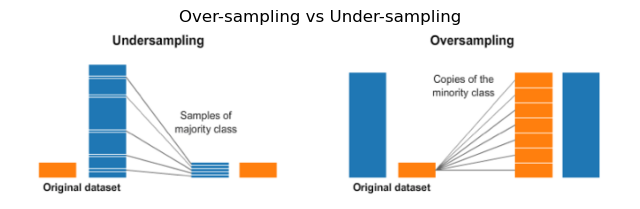

In [26]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("over-under sampling.webp")

plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis("off")
plt.title("Over-sampling vs Under-sampling")
plt.show()


In [28]:
pip install imbalanced-learn


   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imbalanced-learn]

Note: you may need to restart the kernel to use updated packages.


In [29]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


In [34]:

# UNDERSAMPLING - NEAR MISS

nearmiss = NearMiss(
    version=1,  # NearMiss-1 (le plus courant)
    n_neighbors=3
)

X_train_nm, y_train_nm = nearmiss.fit_resample(X_train, y_train)

print("Distribution après NearMiss :")
print(y_train_nm.value_counts())
print(y_train_nm.value_counts(normalize=True))



Distribution après NearMiss :
SeriousDlqin2yrs
0    7385
1    7385
Name: count, dtype: int64
SeriousDlqin2yrs
0    0.5
1    0.5
Name: proportion, dtype: float64


In [36]:
X_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
57215,0.040596,73,0,0.011988,1000.0,4,0,0,0,0
111875,0.418290,55,1,0.106199,4500.0,12,0,0,1,0
96442,0.256931,65,0,1580.000000,5400.0,12,0,1,0,0
26076,0.888741,41,0,0.214218,3150.0,2,0,1,0,2
28360,0.611071,33,0,0.895689,3316.0,12,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...
56559,0.315612,62,0,0.468804,5833.0,11,0,1,0,0
93140,1.000000,48,0,0.004310,2783.0,0,0,0,0,1
77028,0.073783,50,0,0.240208,22900.0,13,0,1,0,3
132548,0.612823,63,0,0.073719,2400.0,8,0,0,0,0


In [41]:
#Oversampling - SMOTE

# 1) Conversion en float pour SMOTE
X_train_float = X_train.astype(float)

# 2) Oversampling avec SMOTE
sm = SMOTE(random_state=123)
X_res, y_res = sm.fit_resample(X_train_float, y_train)

# 3) Colonnes de comptage à arrondir
int_cols = [
    "NumberOfDependents",
    "NumberOfTime30-59DaysPastDueNotWorse",
    "NumberOfTime60-89DaysPastDueNotWorse",
    "NumberOfTimes90DaysLate",
    "NumberOfOpenCreditLinesAndLoans",
    "NumberRealEstateLoansOrLines"
]

# 4) Arrondi + sécurité
X_res[int_cols] = X_res[int_cols].round().clip(lower=0).astype(int)

# 5) Vérification
print("Shape after oversampling:", X_res.shape)
print("Class distribution:")
print(y_res.value_counts())
print("\nDtypes after rounding:")
print(X_res[int_cols].dtypes)



Shape after oversampling: (204344, 10)
Class distribution:
SeriousDlqin2yrs
0    102172
1    102172
Name: count, dtype: int64

Dtypes after rounding:
NumberOfDependents                      int64
NumberOfTime30-59DaysPastDueNotWorse    int64
NumberOfTime60-89DaysPastDueNotWorse    int64
NumberOfTimes90DaysLate                 int64
NumberOfOpenCreditLinesAndLoans         int64
NumberRealEstateLoansOrLines            int64
dtype: object


In [43]:
pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   - -------------------------------------- 1.8/72.0 MB 11.2 MB/s eta 0:00:07
   - -------------------------------------- 2.4/72.0 MB 11.2 MB/s eta 0:00:07
   - -------------------------------------- 2.4/72.0 MB 11.2 MB/s eta 0:00:07
   - -------------------------------------- 2.4/72.0 MB 11.2 MB/s eta 0:00:07
   - -------------------------------------- 2.4/72.0 MB 11.2 MB/s eta 0:00:07
   - -------------------------------------- 2.4/72.0 MB 11.2 MB/s eta 0:00:07
   -- ------------------------------------- 4.2/72.0 MB 2.8 MB/s eta 0:00:25
   -- ------------------------------------- 4.7/72.0 MB 3.1 MB/s eta 0:00:22
   -- ------------------------------------- 4.7/72.0 MB 3.1 MB/s eta 0:00:22
   --- ------------------------------------ 5.5/72.0 MB 2.6 MB/s eta 0:00:26
   --- ------------------------------------ 7.1/72.0 MB 3.1 MB/s eta 0:00:21
   --- ------------------------------------ 7.1/72.0 MB 3.1 MB/s eta 0:00:21


In [44]:
# ============================================================================
# GRILLE DE PARAMÈTRES POUR XGBOOST
# ============================================================================
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}

# ============================================================================
# FONCTION D'ENTRAÎNEMENT AVEC GRIDSEARCHCV
# ============================================================================
def train_xgb(X_train_data, y_train_data, name="Dataset"):
    print("\n" + "="*60)
    print(f"XGBoost - GridSearchCV ({name})")
    print("="*60)

    xgb_model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='auc',
        use_label_encoder=False,
        random_state=123,
        n_jobs=-1
    )

    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        cv=3,
        scoring='roc_auc',
        verbose=2,
        n_jobs=-1,
        return_train_score=True
    )

    start_time = time()
    grid_search.fit(X_train_data, y_train_data)
    elapsed_time = time() - start_time
    print(f"\n✓ Grid Search terminée en {elapsed_time/60:.2f} minutes")

    best_model = grid_search.best_estimator_
    print(f"\nMeilleurs paramètres ({name}): {grid_search.best_params_}")
    print(f"Meilleur score CV AUC-ROC: {grid_search.best_score_:.4f}")

    # Prédictions sur train set
    y_train_proba = best_model.predict_proba(X_train_data)[:,1]

    # Ajustement du seuil pour la classe 1
    threshold = 0.2
    y_train_pred = (y_train_proba >= threshold).astype(int)

    # Métriques
    auc_train = roc_auc_score(y_train_data, y_train_proba)
    print(f"\nAUC-ROC sur {name} train: {auc_train:.4f}")
    print(f"\nClassification Report avec seuil {threshold}:")
    print(classification_report(y_train_data, y_train_pred, target_names=['Pas de défaut (0)', 'Défaut (1)']))

    # Importance des features
    importance_df = pd.DataFrame({
        'Variable': X_train_data.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    print("\nTop 5 variables importantes:")
    print(importance_df.head(5).to_string(index=False))

    return best_model, grid_search.best_score_, importance_df

# ============================================================================
# ENTRAÎNEMENT SUR OVERSAMPLING
# ============================================================================
best_xgb_over, score_over, importance_over = train_xgb(X_res, y_res, name="Oversampling")

# ============================================================================
# ENTRAÎNEMENT SUR UNDERSAMPLING
# ============================================================================
best_xgb_under, score_under, importance_under = train_xgb(X_train_nm, y_train_nm, name="Undersampling")

# ============================================================================
# ÉVALUATION SUR TEST SET AVEC SEUIL
# ============================================================================
def evaluate_test(model, X_test, y_test, threshold=0.2, name="Dataset"):
    y_proba = model.predict_proba(X_test)[:,1]
    y_pred = (y_proba >= threshold).astype(int)
    
    auc = roc_auc_score(y_test, y_proba)
    print(f"\nAUC-ROC sur test ({name}): {auc:.4f}")
    print(f"\nClassification Report avec seuil {threshold}:")
    print(classification_report(y_test, y_pred, target_names=['Pas de défaut (0)', 'Défaut (1)']))
    
    return auc

auc_over_test = evaluate_test(best_xgb_over, X_test, y_test, threshold=0.2, name="Oversampling")
auc_under_test = evaluate_test(best_xgb_under, X_test, y_test, threshold=0.2, name="Undersampling")

# ============================================================================
# COMPARAISON FINALE
# ============================================================================
print("\n" + "="*60)
print("COMPARAISON DES STRATÉGIES D'ÉCHANTILLONNAGE")
print("="*60)
print(f"AUC-ROC CV Oversampling: {score_over:.4f}")
print(f"AUC-ROC CV Undersampling: {score_under:.4f}")
print(f"AUC-ROC Test Oversampling: {auc_over_test:.4f}")
print(f"AUC-ROC Test Undersampling: {auc_under_test:.4f}")

if auc_over_test > auc_under_test:
    print("\n Oversampling donne de meilleurs résultats sur le test set")
else:
    print("\n Undersampling donne de meilleurs résultats sur le test set")


XGBoost - GridSearchCV (Oversampling)
Fitting 3 folds for each of 243 candidates, totalling 729 fits


c:\Users\hp\anaconda3\envs\Ilias_projects\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:59:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✓ Grid Search terminée en 5.49 minutes

Meilleurs paramètres (Oversampling): {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.9}
Meilleur score CV AUC-ROC: 0.9774

AUC-ROC sur Oversampling train: 0.9966

Classification Report:
                   precision    recall  f1-score   support

Pas de défaut (0)       0.96      0.98      0.97    102172
       Défaut (1)       0.98      0.96      0.97    102172

         accuracy                           0.97    204344
        macro avg       0.97      0.97      0.97    204344
     weighted avg       0.97      0.97      0.97    204344


Top 5 variables importantes:
                            Variable  Importance
             NumberOfTimes90DaysLate    0.309276
RevolvingUtilizationOfUnsecuredLines    0.161482
NumberOfTime30-59DaysPastDueNotWorse    0.147856
                                 age    0.123827
NumberOfTime60-89DaysPastDueNotWorse    0.109198

XGBoost - GridSearchCV (Undersampling)

c:\Users\hp\anaconda3\envs\Ilias_projects\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:59:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✓ Grid Search terminée en 0.45 minutes

Meilleurs paramètres (Undersampling): {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Meilleur score CV AUC-ROC: 0.9368

AUC-ROC sur Undersampling train: 0.9572

Classification Report:
                   precision    recall  f1-score   support

Pas de défaut (0)       0.87      0.92      0.89      7385
       Défaut (1)       0.92      0.86      0.89      7385

         accuracy                           0.89     14770
        macro avg       0.89      0.89      0.89     14770
     weighted avg       0.89      0.89      0.89     14770


Top 5 variables importantes:
                            Variable  Importance
NumberOfTime30-59DaysPastDueNotWorse    0.254093
             NumberOfTimes90DaysLate    0.230815
NumberOfTime60-89DaysPastDueNotWorse    0.153392
RevolvingUtilizationOfUnsecuredLines    0.093611
                           DebtRatio    0.067421

AUC-ROC sur test (Oversampling): 0.82


XGBoost - GridSearchCV (Oversampling)
Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\hp\anaconda3\envs\Ilias_projects\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:12:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✓ Grid Search terminée en 0.22 minutes

Meilleurs paramètres (Oversampling): {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'subsample': 0.8}
Meilleur score CV AUC-ROC: 0.9126

AUC-ROC sur Oversampling train: 0.9142

Classification Report avec seuil 0.4:
                   precision    recall  f1-score   support

Pas de défaut (0)       0.88      0.76      0.81    102172
       Défaut (1)       0.79      0.90      0.84    102172

         accuracy                           0.83    204344
        macro avg       0.83      0.83      0.83    204344
     weighted avg       0.83      0.83      0.83    204344


Top 5 variables importantes:
                            Variable  Importance
             NumberOfTimes90DaysLate    0.300278
RevolvingUtilizationOfUnsecuredLines    0.277348
NumberOfTime30-59DaysPastDueNotWorse    0.224721
NumberOfTime60-89DaysPastDueNotWorse    0.088755
                                 age

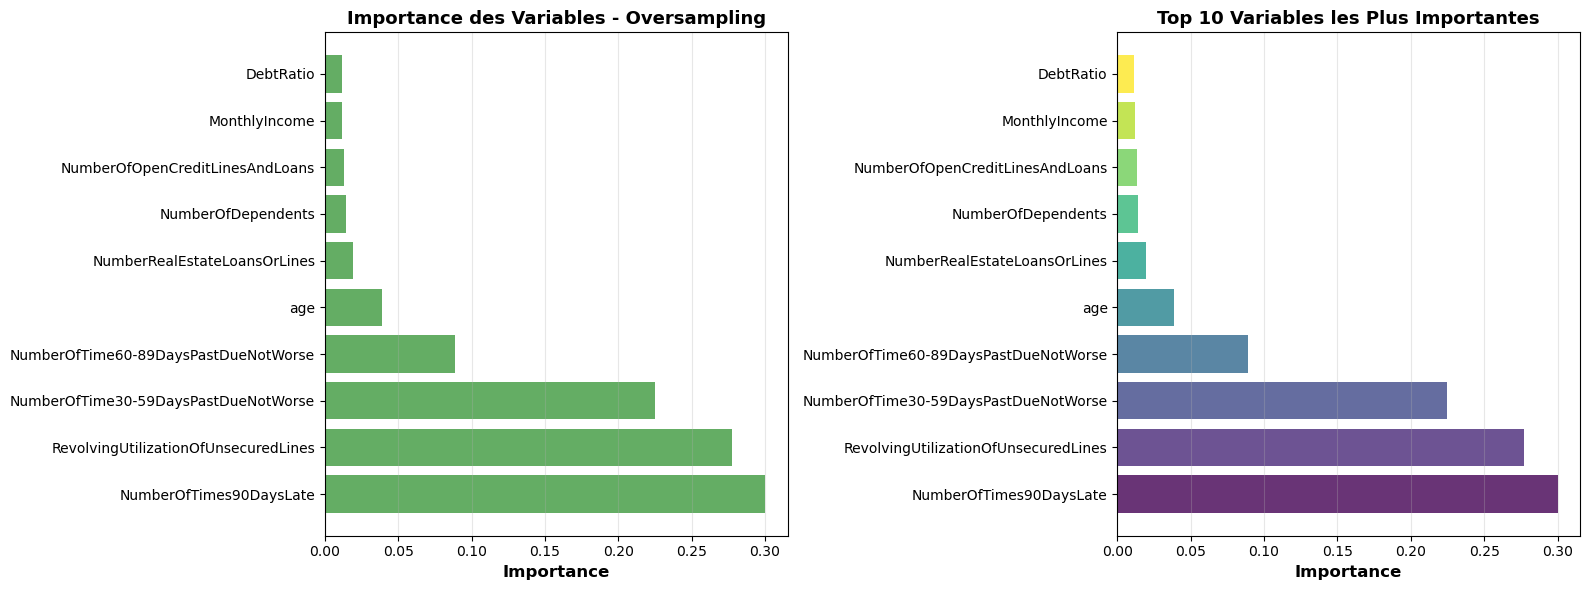


XGBoost - GridSearchCV (Undersampling)
Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\hp\anaconda3\envs\Ilias_projects\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:12:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✓ Grid Search terminée en 0.03 minutes

Meilleurs paramètres (Undersampling): {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'subsample': 0.8}
Meilleur score CV AUC-ROC: 0.9188

AUC-ROC sur Undersampling train: 0.9428

Classification Report avec seuil 0.4:
                   precision    recall  f1-score   support

Pas de défaut (0)       0.87      0.86      0.87      7385
       Défaut (1)       0.86      0.87      0.87      7385

         accuracy                           0.87     14770
        macro avg       0.87      0.87      0.87     14770
     weighted avg       0.87      0.87      0.87     14770


Top 5 variables importantes:
                            Variable  Importance
NumberOfTime30-59DaysPastDueNotWorse    0.321361
             NumberOfTimes90DaysLate    0.225904
NumberOfTime60-89DaysPastDueNotWorse    0.103548
     NumberOfOpenCreditLinesAndLoans    0.071950
RevolvingUtilizationOfUnsecuredLin

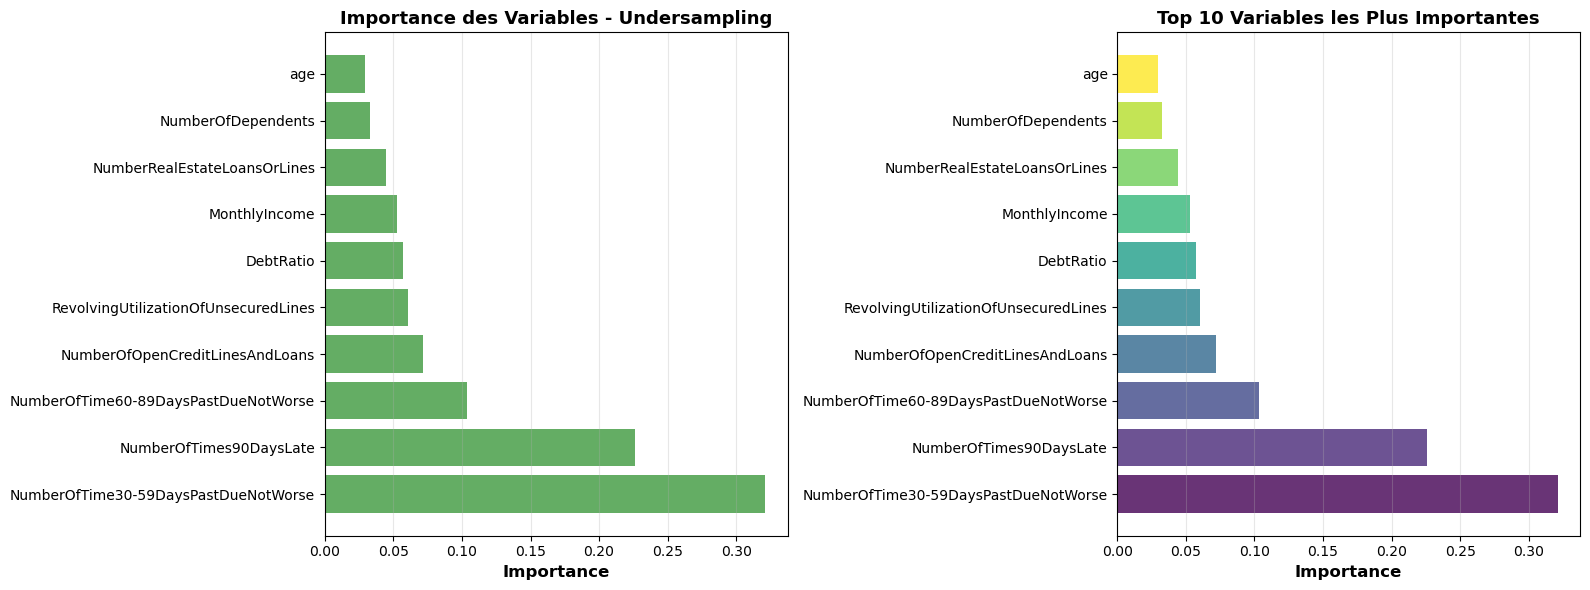


AUC-ROC sur test (Oversampling): 0.8512

Classification Report avec seuil 0.4:
                   precision    recall  f1-score   support

Pas de défaut (0)       0.98      0.75      0.85     34057
       Défaut (1)       0.19      0.80      0.31      2462

         accuracy                           0.76     36519
        macro avg       0.59      0.78      0.58     36519
     weighted avg       0.93      0.76      0.82     36519



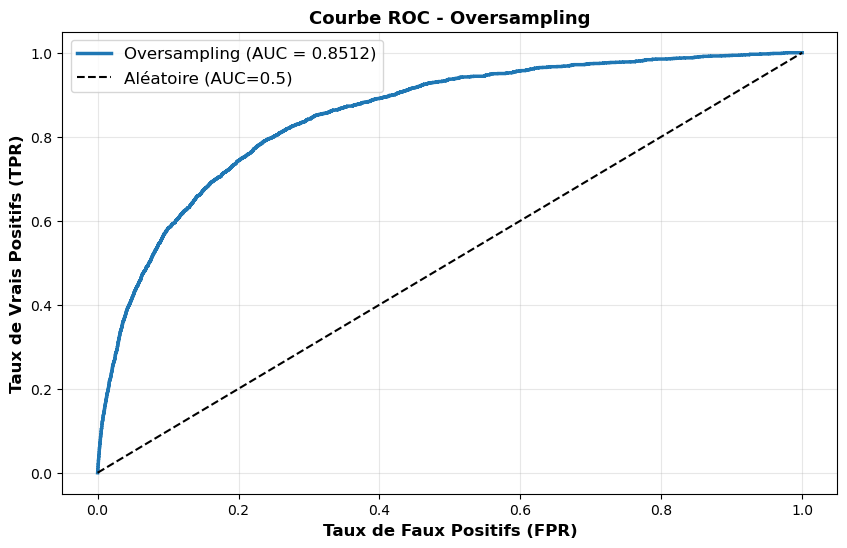

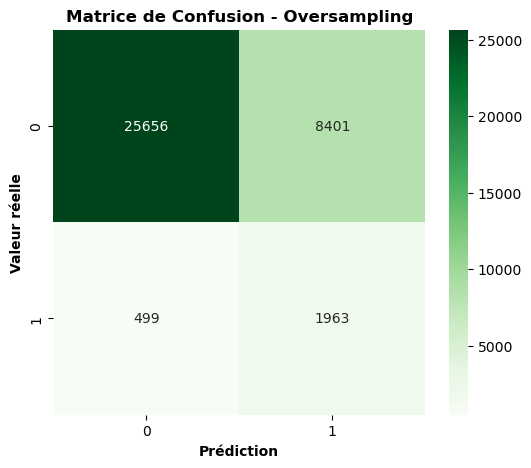


AUC-ROC sur test (Undersampling): 0.6645

Classification Report avec seuil 0.4:
                   precision    recall  f1-score   support

Pas de défaut (0)       0.97      0.35      0.51     34057
       Défaut (1)       0.09      0.86      0.16      2462

         accuracy                           0.38     36519
        macro avg       0.53      0.61      0.34     36519
     weighted avg       0.91      0.38      0.49     36519



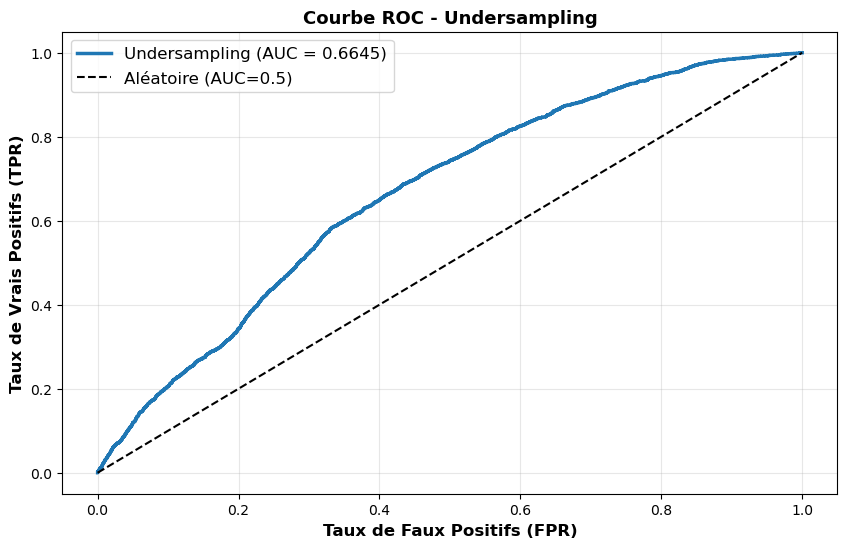

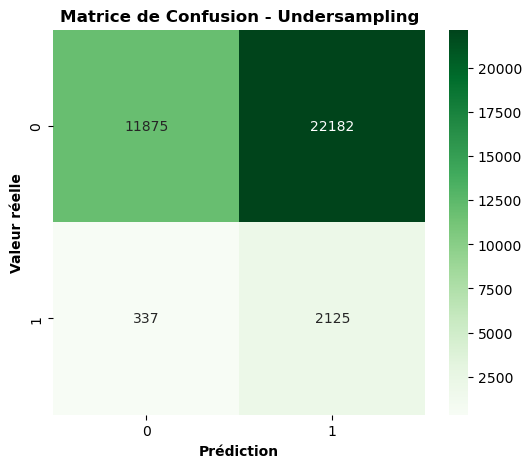


COMPARAISON DES STRATÉGIES D'ÉCHANTILLONNAGE
AUC-ROC CV Oversampling: 0.9126
AUC-ROC CV Undersampling: 0.9188
AUC-ROC Test Oversampling: 0.8512
AUC-ROC Test Undersampling: 0.6645

 Oversampling donne de meilleurs résultats sur le test set


In [ ]:
import xgboost as xgb

# PARAMÈTRES POUR XGBOOST Déjà OPTIMISÉS

param_grid = {
    'n_estimators': [500],        # nombre élevé car learning_rate bas
    'max_depth': [6],             # arbres pas trop profonds
    'learning_rate': [0.01],      # learning rate bas pour un apprentissage progressif
    'subsample': [0.8],           # fraction d'échantillons pour chaque arbre (évite overfit)
    'colsample_bytree': [0.8],    # fraction de features pour chaque arbre
    'reg_alpha': [0.1],           # régularisation L1 pour réduire surapprentissage
    'reg_lambda': [1.0],          # régularisation L2 par défaut
}


# FONCTION D'ENTRAÎNEMENT AVEC GRIDSEARCHCV

def train_xgb(X_train_data, y_train_data, name="Dataset", threshold=0.5):
    print("\n" + "="*60)
    print(f"XGBoost - GridSearchCV ({name})")
    print("="*60)

    xgb_model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='auc',
        use_label_encoder=False,
        random_state=123,
        n_jobs=-1
    )

    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        cv=3,
        scoring='roc_auc',
        verbose=2,
        n_jobs=-1,
        return_train_score=True
    )

    start_time = time()
    grid_search.fit(X_train_data, y_train_data)
    elapsed_time = time() - start_time
    print(f"\n✓ Grid Search terminée en {elapsed_time/60:.2f} minutes")

    best_model = grid_search.best_estimator_
    print(f"\nMeilleurs paramètres ({name}): {grid_search.best_params_}")
    print(f"Meilleur score CV AUC-ROC: {grid_search.best_score_:.4f}")

    # Prédictions sur train set
    y_train_proba = best_model.predict_proba(X_train_data)[:,1]
    y_train_pred = (y_train_proba >= threshold).astype(int)

    # Métriques
    auc_train = roc_auc_score(y_train_data, y_train_proba)
    print(f"\nAUC-ROC sur {name} train: {auc_train:.4f}")
    print(f"\nClassification Report avec seuil {threshold}:")
    print(classification_report(y_train_data, y_train_pred, target_names=['Pas de défaut (0)', 'Défaut (1)']))

    # Importance features
    importance_df = pd.DataFrame({
        'Variable': X_train_data.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    print("\nTop 5 variables importantes:")
    print(importance_df.head(5).to_string(index=False))

    # Visualisation feature importance
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Graphique 1: Toutes les variables
    axes[0].barh(importance_df['Variable'], importance_df['Importance'], color='forestgreen', alpha=0.7)
    axes[0].set_xlabel('Importance', fontsize=12, fontweight='bold')
    axes[0].set_title(f'Importance des Variables - {name}', fontsize=13, fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)

    # Graphique 2: Top 10
    top_10 = importance_df.head(10)
    colors = plt.cm.viridis(np.linspace(0, 1, 10))
    axes[1].barh(top_10['Variable'], top_10['Importance'], color=colors, alpha=0.8)
    axes[1].set_xlabel('Importance', fontsize=12, fontweight='bold')
    axes[1].set_title('Top 10 Variables les Plus Importantes', fontsize=13, fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.show()

    return best_model, grid_search.best_score_, importance_df


# ENTRAÎNEMENT SUR OVERSAMPLING

best_xgb_over, score_over, importance_over = train_xgb(X_res, y_res, name="Oversampling", threshold=0.5)


# ENTRAÎNEMENT SUR UNDERSAMPLING

best_xgb_under, score_under, importance_under = train_xgb(X_train_nm, y_train_nm, name="Undersampling", threshold=0.5)


# ÉVALUATION SUR TEST SET AVEC SEUIL

def evaluate_test(model, X_test, y_test, threshold=0.4, name="Dataset"):
    y_proba = model.predict_proba(X_test)[:,1]
    y_pred = (y_proba >= threshold).astype(int)

    auc = roc_auc_score(y_test, y_proba)
    print(f"\nAUC-ROC sur test ({name}): {auc:.4f}")
    print(f"\nClassification Report avec seuil {threshold}:")
    print(classification_report(y_test, y_pred, target_names=['Pas de défaut (0)', 'Défaut (1)']))

    # Courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})', linewidth=2.5)
    plt.plot([0,1],[0,1],'k--', label='Aléatoire (AUC=0.5)')
    plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12, fontweight='bold')
    plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12, fontweight='bold')
    plt.title(f'Courbe ROC - {name}', fontsize=13, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['0','1'], yticklabels=['0','1'])
    plt.xlabel('Prédiction', fontweight='bold')
    plt.ylabel('Valeur réelle', fontweight='bold')
    plt.title(f'Matrice de Confusion - {name}', fontweight='bold')
    plt.show()

    return auc

auc_over_test = evaluate_test(best_xgb_over, X_test, y_test, threshold=0.4, name="Oversampling")
auc_under_test = evaluate_test(best_xgb_under, X_test, y_test, threshold=0.4, name="Undersampling")


# COMPARAISON FINALE

print("\n" + "="*60)
print("COMPARAISON DES STRATÉGIES D'ÉCHANTILLONNAGE")
print("="*60)
print(f"AUC-ROC CV Oversampling: {score_over:.4f}")
print(f"AUC-ROC CV Undersampling: {score_under:.4f}")
print(f"AUC-ROC Test Oversampling: {auc_over_test:.4f}")
print(f"AUC-ROC Test Undersampling: {auc_under_test:.4f}")

if auc_over_test > auc_under_test:
    print("\n Oversampling donne de meilleurs résultats sur le test set")
else:
    print("\n Undersampling donne de meilleurs résultats sur le test set")


In [52]:
pip install torch

  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/110.9 MB ? eta -:--:--
   ---------------------------------------- 1.3/110.9 MB 8.3 MB/s eta 0:00:14
   - -------------------------------------- 2.9/110.9 MB 7.7 MB/s eta 0:00:14
   - -------------------------------------- 3.4/110.9 MB 7.6 MB/s eta 0:00:15
   - -------------------------------------- 3.4/110.9 MB 7.6 MB/s eta 0:00:15
   - -------------------------------------- 3.4/110.9 MB 7.6 MB/s eta 0:00:15
   - -------------------------------------- 4.5/110.9 MB 3.5 MB/s eta 0:00:31
   -- ------------------------------------- 5.8/110.9 MB 3.9 MB/s eta 0:00:27
   -- ------------------------------------- 5.8/110.9 MB 3.9 MB/s eta 0:00:27
   -- ------------------------------------

Epoch [1/30] | Train Loss: 0.5401 | Val Loss: 0.4860 | Val AUC: 0.8586
Epoch [2/30] | Train Loss: 0.5155 | Val Loss: 0.4817 | Val AUC: 0.8607
Epoch [3/30] | Train Loss: 0.5034 | Val Loss: 0.4789 | Val AUC: 0.8620
Epoch [4/30] | Train Loss: 0.4999 | Val Loss: 0.4770 | Val AUC: 0.8633
Epoch [5/30] | Train Loss: 0.4910 | Val Loss: 0.4789 | Val AUC: 0.8628
Epoch [6/30] | Train Loss: 0.4966 | Val Loss: 0.4726 | Val AUC: 0.8666
Epoch [7/30] | Train Loss: 0.4854 | Val Loss: 0.4742 | Val AUC: 0.8671
Epoch [8/30] | Train Loss: 0.4681 | Val Loss: 0.4497 | Val AUC: 0.8721
Epoch [9/30] | Train Loss: 0.4570 | Val Loss: 0.4421 | Val AUC: 0.8779
Epoch [10/30] | Train Loss: 0.4492 | Val Loss: 0.4373 | Val AUC: 0.8802
Epoch [11/30] | Train Loss: 0.4440 | Val Loss: 0.4332 | Val AUC: 0.8825
Epoch [12/30] | Train Loss: 0.4499 | Val Loss: 0.4349 | Val AUC: 0.8814
Epoch [13/30] | Train Loss: 0.4413 | Val Loss: 0.4312 | Val AUC: 0.8828
Epoch [14/30] | Train Loss: 0.4414 | Val Loss: 0.4314 | Val AUC: 0.8846
E

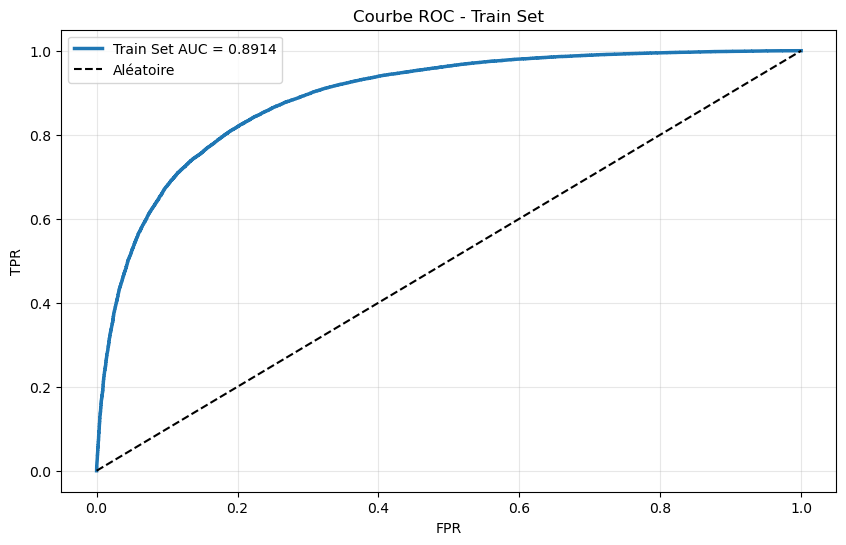

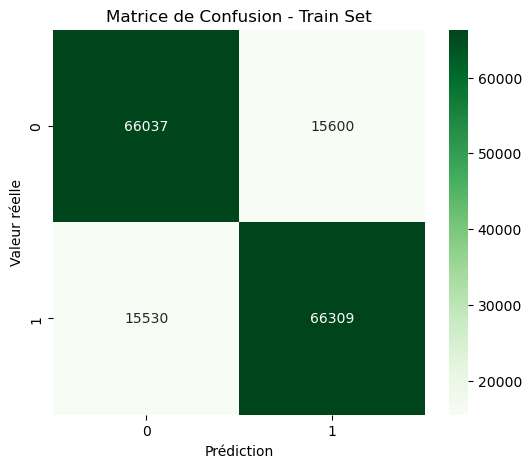


=== Test Set ===
AUC-ROC: 0.8542
Classification Report:
                   precision    recall  f1-score   support

Pas de défaut (0)       0.98      0.81      0.89     34057
       Défaut (1)       0.22      0.74      0.34      2462

         accuracy                           0.81     36519
        macro avg       0.60      0.77      0.61     36519
     weighted avg       0.93      0.81      0.85     36519

Classe 0 (Pas de défaut) -> Precision: 0.9772, Recall: 0.8112, F1: 0.8865
Classe 1 (Défaut) -> Precision: 0.2204, Recall: 0.7384, F1: 0.3395


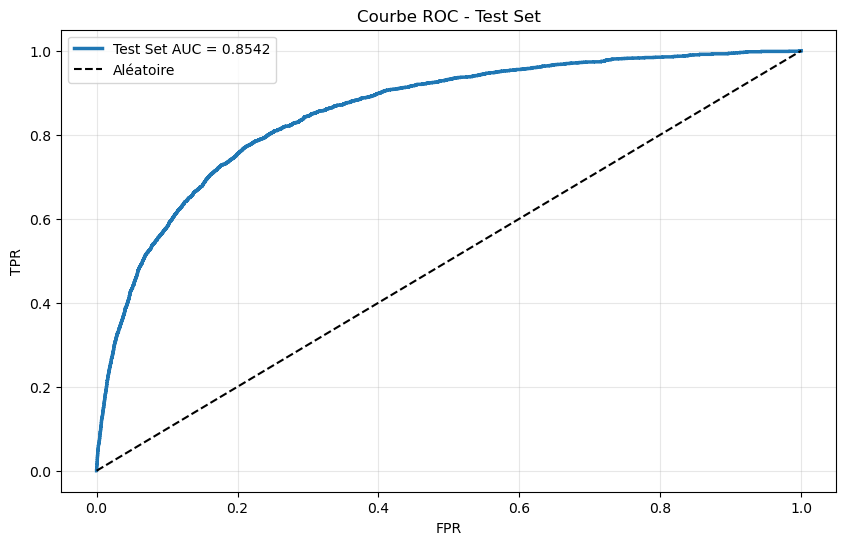

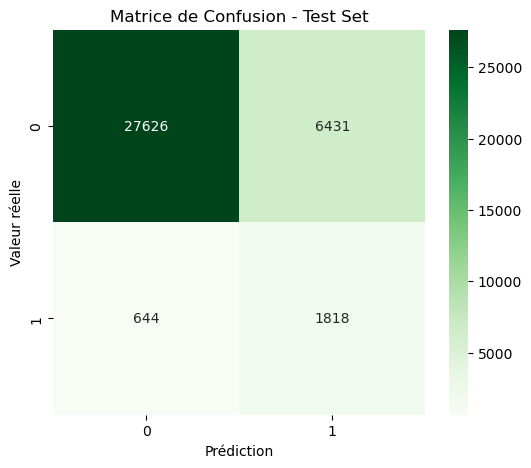

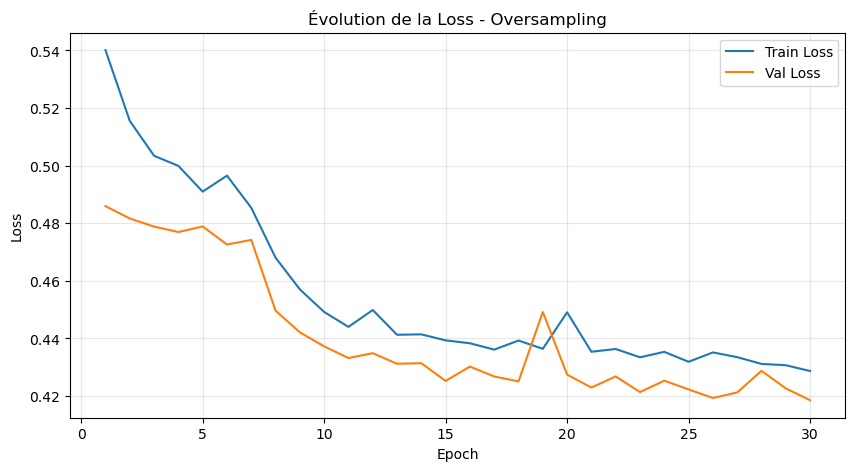

In [73]:
# 0. Imports

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler, random_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


# 1. Préparer les données (Oversampling)

# Conversion en float et remplacement des NaN
X_res_numeric = X_res.apply(pd.to_numeric, errors='coerce').fillna(0)
y_res_numeric = y_res.astype(np.int64)

# Normalisation des features
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res_numeric)
X_res_scaled = pd.DataFrame(X_res_scaled, columns=X_res_numeric.columns)

# Conversion en tensors
X_tensor = torch.tensor(X_res_scaled.values, dtype=torch.float32)
y_tensor = torch.tensor(y_res_numeric.values, dtype=torch.long)

# Split train / validation (80% train, 20% val)
val_size = int(0.2 * len(X_tensor))
train_size = len(X_tensor) - val_size
train_dataset, val_dataset = random_split(TensorDataset(X_tensor, y_tensor), [train_size, val_size])


# 2. Gestion du déséquilibre des classes

y_train_array = y_res_numeric[:train_size]  # subset pour train uniquement
class_counts = np.bincount(y_train_array)
class_weights = 1. / class_counts
samples_weights = class_weights[y_train_array]
sampler = WeightedRandomSampler(weights=samples_weights, num_samples=len(samples_weights), replacement=True)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Dataset test (X_test peut être un hold-out séparé)
X_test_numeric = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test_scaled = scaler.transform(X_test_numeric)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_numeric.columns)

X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.astype(np.int64).values, dtype=torch.long)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# 3. Définir le MLP

class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.model(x)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = MLP(X_tensor.shape[1]).to(device)


# 4. Loss et optimizer

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# 5. Boucle d'entraînement

num_epochs = 30
train_losses, val_losses = [], []
best_auc = 0
best_model_state = None
threshold = 0.5  # ajustable pour la classe 1

for epoch in range(num_epochs):
    # ---- Entraînement ----
    model.train()
    running_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.float().to(device)
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_batch.size(0)
    
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    
    # ---- Validation ----
    model.eval()
    val_running_loss = 0
    all_preds, all_targets = [], []
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.float().to(device)
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            val_running_loss += loss.item() * X_batch.size(0)
            all_preds.append(outputs.cpu())
            all_targets.append(y_batch.cpu())
    
    val_loss = val_running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    
    y_val_pred = torch.cat(all_preds)
    y_val_true = torch.cat(all_targets)
    y_val_class = (y_val_pred >= threshold).int()
    
    auc = roc_auc_score(y_val_true, y_val_pred)
    print(f"Epoch [{epoch+1}/{num_epochs}] | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Val AUC: {auc:.4f}")
    
    if auc > best_auc:
        best_auc = auc
        best_model_state = model.state_dict()

# Charger le meilleur modèle
model.load_state_dict(best_model_state)


# 6. Fonction pour évaluation complète

def evaluate_model(loader, dataset_name="Dataset"):
    model.eval()
    all_preds, all_targets = [], []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch).squeeze()
            all_preds.append(outputs.cpu())
            all_targets.append(y_batch.cpu())
    y_pred = torch.cat(all_preds)
    y_true = torch.cat(all_targets)
    y_class = (y_pred >= threshold).int()
    
    auc = roc_auc_score(y_true, y_pred)
    print(f"\n=== {dataset_name} ===")
    print(f"AUC-ROC: {auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_true, y_class, target_names=['Pas de défaut (0)', 'Défaut (1)']))
    
    # Precision, recall, f1 pour chaque classe
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_class, labels=[0,1])
    for i, c in enumerate(['0 (Pas de défaut)', '1 (Défaut)']):
        print(f"Classe {c} -> Precision: {precision[i]:.4f}, Recall: {recall[i]:.4f}, F1: {f1[i]:.4f}")
    
    # Courbe ROC
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, label=f'{dataset_name} AUC = {auc:.4f}', linewidth=2.5)
    plt.plot([0,1],[0,1],'k--', label='Aléatoire')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'Courbe ROC - {dataset_name}')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()
    
    # Matrice de confusion
    cm = confusion_matrix(y_true, y_class)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['0','1'], yticklabels=['0','1'])
    plt.xlabel('Prédiction')
    plt.ylabel('Valeur réelle')
    plt.title(f'Matrice de Confusion - {dataset_name}')
    plt.show()
    
    return y_true, y_pred

# Évaluation sur train et test
y_train_true, y_train_pred = evaluate_model(train_loader, "Train Set")
y_test_true, y_test_pred = evaluate_model(test_loader, "Test Set")


# 7. Visualisation Loss

plt.figure(figsize=(10,5))
plt.plot(range(1,num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1,num_epochs+1), val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Évolution de la Loss - Oversampling')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

